In [378]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

# __Data Preprocessing__

In [379]:
df = pd.read_csv('dataset.csv')
df.head()

,Maritalstatus,Applicationmode,Applicationorder,Course,Daytimeeveningattendance,Previousqualification,Nationality,Mothersqualification,Fathersqualification,Mothersoccupation,...,Curricularunits2ndsem(credited),Curricularunits2ndsem(enrolled),Curricularunits2ndsem(evaluations),Curricularunits2ndsem(approved),Curricularunits2ndsem(grade),Curricularunits2ndsem(withoutevaluations),Unemploymentrate,Inflationrate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Cleaning the column names

In [380]:
# Rename mispelled column name
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True) 

In [381]:
#renaming the columns
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('/', '')
df.columns = df.columns.str.replace("'", '')

### Checking for NULL / NaN values

In [382]:
#check for any NaN values under the entire DataFrame
df.isnull().sum().sum()

0

In [383]:
#Checking Dtype
print("Data dims : ", df.shape) 
df.info() 

Data dims :  (4424, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Maritalstatus                              4424 non-null   int64  
 1   Applicationmode                            4424 non-null   int64  
 2   Applicationorder                           4424 non-null   int64  
 3   Course                                     4424 non-null   int64  
 4   Daytimeeveningattendance                   4424 non-null   int64  
 5   Previousqualification                      4424 non-null   int64  
 6   Nationality                                4424 non-null   int64  
 7   Mothersqualification                       4424 non-null   int64  
 8   Fathersqualification                       4424 non-null   int64  
 9   Mothersoccupation                          4424 non-null   int64  
 10  

## Creating Ordinal data

Ordinal scale is where the order matters but not the difference between values. <br>
<br> Level of qualification can be ranked through an ordinal scale; however, it was not done so in the dataset. We hence need to reassign the numerical representations assigned to the qualification variables after ranking the various qualification levels provided.

Reference: https://www.graphpad.com/support/faq/what-is-the-difference-between-ordinal-interval-and-ratio-variables-why-should-i-care/ 

### Replacing and ranking the levels of qualifications under 'Previousqualification'

#### Initial list of variables for Previousqualification
1—Secondary education <br>
2—Higher education—bachelor’s degree <br>
3—Higher education—degree <br>
4—Higher education—master’s degree <br>
5—Higher education—doctorate <br>
6—Frequency of higher education <br>
7—12th year of schooling—not completed <br>
8—11th year of schooling—not completed <br>
9—Other—11th year of schooling <br>
10—10th year of schooling <br>
11—10th year of schooling—not completed <br>
12—Basic education 3rd cycle (9th/10th/11th year) or equivalent <br>
13—Basic education 2nd cycle (6th/7th/8th year) or equivalent <br>
14—Technological specialization course <br>
15—Higher education—degree (1st cycle) <br>
16—Professional higher technical course <br>
17—Higher education—master’s degree (2nd cycle)

#### Rearranged list of variables for Previousqualification

From https://en.wikipedia.org/wiki/Education_in_Portugal, high school = secondary education which constitutes years 10, 11 and 12. 

1 - Basic education 2nd cycle (6th/7th/8th year) or equivalent <br>
2 - 10th year of schooling—not completed <br>
3 - 10th year of schooling <br>
4 - 11th year of schooling—not completed <br>
5 - Other—11th year of schooling = Basic education 3rd cycle (9th/10th/11th year) or equivalent <br>
6 - 12th year of schooling—not completed <br>
7 - Secondary education <br>
8 - Frequency of higher education #assmue that higher education was incomplete <br>
9 - Technological specialization course <br>
10 - Professional higher technical course <br>
11 - Higher education—degree = Higher education—degree (1st cycle) <br>
12 - Higher education—bachelor’s degree <br>
13 - Higher education—master’s degree <br>
14 - Higher education—master’s degree (2nd cycle) <br>
15 - Higher education—doctorate <br>

In [384]:
#using key:value to replace values under 'Previousqualification'
df['Previousqualification'] = df['Previousqualification'].replace({1:7, 2:12, 3:11, 4:13, 5:15, 6:8, 7:6, 8:4, 9:5, 10:3, 11:2, 12:5, 13:1, 14:9, 15:11, 16:10, 17:14})

print(df['Previousqualification'])

0       7
1       7
2       7
3       7
4       7
       ..
4419    7
4420    7
4421    7
4422    7
4423    7
Name: Previousqualification, Length: 4424, dtype: int64


In [385]:
#to double check if the dictionary is correct
print(df[['Previousqualification']].to_string())

      Previousqualification
0                         7
1                         7
2                         7
3                         7
4                         7
5                         5
6                         7
7                         7
8                         7
9                         7
10                        7
11                        7
12                        7
13                       10
14                        7
15                        7
16                        7
17                        7
18                        7
19                        7
20                        7
21                        7
22                        7
23                        7
24                        7
25                        7
26                        7
27                        7
28                        7
29                        7
30                        9
31                        7
32                        7
33                        7
34                  

### Replacing and ranking the levels of qualifications under 'Mothersqualification' and 'Fathersqualification'

#### Initial list of variables for Mothersqualification and Fathersqualification
1—Secondary Education—12th Year of Schooling or Equivalent <br>
2—Higher Education—bachelor’s degree <br>
3—Higher Education—degree <br>
4—Higher Education—master’s degree <br>
5—Higher Education—doctorate <br>
6—Frequency of Higher Education <br>
7—12th Year of Schooling—not completed <br>
8—11th Year of Schooling—not completed <br>
9—7th Year (Old) <br>
10—Other—11th Year of Schooling <br>
11—2nd year complementary high school course <br>
12—10th Year of Schooling <br>
13—General commerce course <br>
14—Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent <br>
15—Complementary High School Course <br>
16—Technical-professional course <br>
17—Complementary High School Course—not concluded <br>
18—7th year of schooling <br>
19—2nd cycle of the general high school course <br>
20—9th Year of Schooling—not completed <br>
21—8th year of schooling <br>
22—General Course of Administration and Commerce <br>
23—Supplementary Accounting and Administration <br>
24—Unknown <br>
25—Cannot read or write <br>
26—Can read without having a 4th year of schooling <br>
27—Basic education 1st cycle (4th/5th year) or equivalent <br>
28—Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent <br>
29—Technological specialization course <br>
30—Higher education—degree (1st cycle) <br>
31—Specialized higher studies course <br>
32—Professional higher technical course <br>
33—Higher Education—master’s degree (2nd cycle) <br>
34—Higher Education—doctorate (3rd cycle) 

#### Rearranged list of variables for Mothersqualification and Fathersqualification

From https://en.wikipedia.org/wiki/Education_in_Portugal, high school = secondary education which constitutes years 10, 11 and 12. 

0 - Unknown <br>
1 - Cannnot read or write <br>
2 - Can read without having a 4th year of schooling <br>
3 - Basic education 1st cycle (4th/5th year) or equivalent <br>
4 - Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent <br>
5 - 7th year (Old) = 7th year of schooling <br>
6 - 8th year of schooling <br>
7 - 9th Year of Schooling—not completed <br>
8 - Complementary High School Course—not concluded <br> 
9 - 10th Year of Schooling <br>
10 - 11th Year of Schooling—not completed <br>
11 - Other—11th Year of Schooling = 2nd year complementary high school course = Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent <br>
                    <br> Counter: 15 <br>
<br>12 - 12th Year of Schooling—not completed <br>
13 - Secondary Education—12th Year of Schooling or Equivalent = Complementary High School Course = 2nd cycle of the general high school course #assume multiple cycles of high school refers to retaking high school after completing it. <br>
                    <br> Counter: 19 <br>
<br> 14 - Frequency of Higher Education #assume that higher education was incomplete <br> 
15 - General commerce course = General Course of Administration and Commerce = Supplementary Accounting and Administration = Technical-professional course = Technological specialization course #assume these courses are merely general specialisation courses and part of higher education but does not constitute as degrees <br>
                    <br> Counter: 25 <br>
<br> 16 - Specialized higher studies course = Professional higher technical course #assume these are higher level specialised that does not constitute degrees <br>
                    <br> Counter: 27 <br>
<br> 17 - Higher Education—degree = Higher education—degree (1st cycle) #assume that 1st cycle means higher completed first higher education degree (eg double degree holders etc), we also assume that the unspecified degree refers to the lowest level of college associate degree https://thebestschools.org/degrees/college-degree-levels/ <br> 
                    <br> Counter: 29 <br>
<br> 18 - Higher Education—bachelor’s degree <br>
19 - Higher Education—master’s degree <br>
20 - Higher Education—master’s degree (2nd cycle) <br>
21 - Higher Education—doctorate <br>
22 - Higher Education—doctorate (3rd cycle) <br>
                    <br> Counter: 34

In [386]:
#using key:value to replace values under 'Mothersqualification' and 'Fathersqualification'

df['Mothersqualification'] = df['Mothersqualification'].replace({1:13, 2:18, 3:17, 4:19, 5:21, 6:14, 7:12, 8:10, 9:5, 10:11, 11:11, 12:9, 13:15, 14:11, 15:13, 16:15, 17:8, 18:5, 19:13, 20:7, 21:6, 22:15, 23:15, 24:0, 25:1, 26:2, 27:3, 28:4, 29:15, 30:17, 31:16, 32:16, 33:20, 34:22})
df['Fathersqualification'] = df['Fathersqualification'].replace({1:13, 2:18, 3:17, 4:19, 5:21, 6:14, 7:12, 8:10, 9:5, 10:11, 11:11, 12:9, 13:15, 14:11, 15:13, 16:15, 17:8, 18:5, 19:13, 20:7, 21:6, 22:15, 23:15, 24:0, 25:1, 26:2, 27:3, 28:4, 29:15, 30:17, 31:16, 32:16, 33:20, 34:22})

print(df[['Mothersqualification', 'Fathersqualification']])

      Mothersqualification  Fathersqualification
0                       15                    11
1                       13                    17
2                       15                     3
3                       15                     3
4                       15                     4
...                    ...                   ...
4419                    13                    13
4420                    13                    13
4421                    15                     3
4422                    15                     3
4423                    15                     3

[4424 rows x 2 columns]


In [387]:
#to double check if the dictionary is correct
print(df[['Mothersqualification', 'Fathersqualification']].to_string())

      Mothersqualification  Fathersqualification
0                       15                    11
1                       13                    17
2                       15                     3
3                       15                     3
4                       15                     4
5                       15                     3
6                       15                     4
7                       15                     3
8                       13                    13
9                       13                    11
10                      15                    11
11                      15                     4
12                      15                     3
13                      13                    13
14                      15                     3
15                      15                     3
16                      15                     4
17                      15                    13
18                      17                    11
19                  

In [388]:
df.head()

,Maritalstatus,Applicationmode,Applicationorder,Course,Daytimeeveningattendance,Previousqualification,Nationality,Mothersqualification,Fathersqualification,Mothersoccupation,...,Curricularunits2ndsem(credited),Curricularunits2ndsem(enrolled),Curricularunits2ndsem(evaluations),Curricularunits2ndsem(approved),Curricularunits2ndsem(grade),Curricularunits2ndsem(withoutevaluations),Unemploymentrate,Inflationrate,GDP,Target
0,1,8,5,2,1,7,1,15,11,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,7,1,13,17,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,7,1,15,3,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,7,1,15,3,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,7,1,15,4,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Altering unknown variables under 'Mothersoccupation' and 'Fathersoccupation'

There were numerical values assigned for 'unknown' or 'blank' occupations. Hence, we need to change them


#### Finding mode of 'Mothersoccupation' and Fathersoccupation'

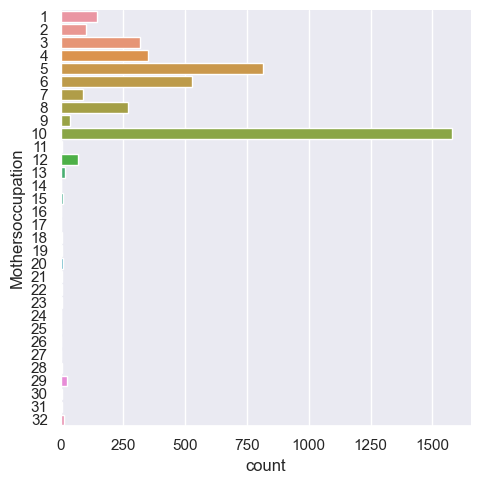

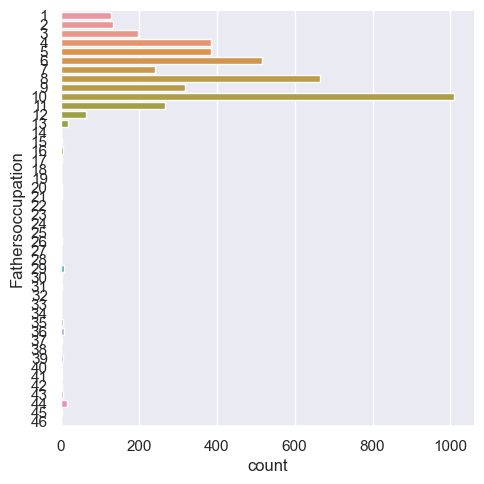

In [389]:
sb.catplot(y = 'Mothersoccupation', data = df, kind = "count")
sb.catplot(y= 'Fathersoccupation', data = df, kind = 'count')

In [390]:
# For Mothersoccupation and Fathersoccupation, mode = 10 (unskilled workers)

#replace variables labelled 'Other Situation' and '(blank)' under occupation with the mode
df['Mothersoccupation'] = df['Mothersoccupation'].replace({12:10, 13:10})
df['Fathersoccupation'] = df['Fathersoccupation'].replace({12:10, 13:10})

In [391]:
#create data set with only variables with meaningful numerical representations
dfnum = df.drop(['Maritalstatus', 'Nationality', 'Applicationmode', 'Course', 'Mothersoccupation', 'Fathersoccupation', 'Gender', 'Daytimeeveningattendance', 'Displaced', 'Educationalspecialneeds', 'Debtor', 'Tuitionfeesuptodate', 'Scholarshipholder', 'International'], axis = 1)

#data set with removed variables
df2 = pd.DataFrame(df[['Maritalstatus', 'Nationality', 'Applicationmode', 'Course', 'Mothersoccupation', 'Fathersoccupation', 'Gender', 'Daytimeeveningattendance', 'Displaced', 'Educationalspecialneeds', 'Debtor', 'Tuitionfeesuptodate', 'Scholarshipholder', 'International']])

In [392]:
list(dfnum.columns)

['Applicationorder',
 'Previousqualification',
 'Mothersqualification',
 'Fathersqualification',
 'Ageatenrollment',
 'Curricularunits1stsem(credited)',
 'Curricularunits1stsem(enrolled)',
 'Curricularunits1stsem(evaluations)',
 'Curricularunits1stsem(approved)',
 'Curricularunits1stsem(grade)',
 'Curricularunits1stsem(withoutevaluations)',
 'Curricularunits2ndsem(credited)',
 'Curricularunits2ndsem(enrolled)',
 'Curricularunits2ndsem(evaluations)',
 'Curricularunits2ndsem(approved)',
 'Curricularunits2ndsem(grade)',
 'Curricularunits2ndsem(withoutevaluations)',
 'Unemploymentrate',
 'Inflationrate',
 'GDP',
 'Target']

In [393]:
dfnum.describe().round(2)

,Applicationorder,Previousqualification,Mothersqualification,Fathersqualification,Ageatenrollment,Curricularunits1stsem(credited),Curricularunits1stsem(enrolled),Curricularunits1stsem(evaluations),Curricularunits1stsem(approved),Curricularunits1stsem(grade),Curricularunits1stsem(withoutevaluations),Curricularunits2ndsem(credited),Curricularunits2ndsem(enrolled),Curricularunits2ndsem(evaluations),Curricularunits2ndsem(approved),Curricularunits2ndsem(grade),Curricularunits2ndsem(withoutevaluations),Unemploymentrate,Inflationrate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.73,7.21,14.61,8.43,23.27,0.71,6.27,8.30,4.71,10.64,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00
std,1.31,1.17,1.90,5.21,7.59,2.36,2.48,4.18,3.09,4.84,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27
min,0.00,1.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,1.00,7.00,13.00,3.00,19.00,0.00,5.00,6.00,3.00,11.00,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70
50%,1.00,7.00,15.00,11.00,20.00,0.00,6.00,8.00,5.00,12.29,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32
75%,2.00,7.00,15.00,13.00,25.00,0.00,7.00,10.00,6.00,13.40,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79
max,9.00,15.00,21.00,22.00,70.00,20.00,26.00,45.00,26.00,18.88,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51


In [394]:
#Save cleaned file
df.to_csv("clean_dataset.csv", index=False )

# __Exploratory Data Analysis__

## Basic exploration about academic data at end of the first semester.

In [395]:
target = pd.DataFrame(df['Target'])
sem1 = df[['Curricularunits1stsem(credited)', 'Curricularunits1stsem(enrolled)', 'Curricularunits1stsem(evaluations)', 'Curricularunits1stsem(approved)', 'Curricularunits1stsem(grade)', 'Curricularunits1stsem(withoutevaluations)']]
sem2 = df[['Curricularunits2ndsem(credited)', 'Curricularunits2ndsem(enrolled)', 'Curricularunits2ndsem(evaluations)', 'Curricularunits2ndsem(approved)', 'Curricularunits2ndsem(grade)', 'Curricularunits2ndsem(withoutevaluations)']]

#Split the Dataset
target_train = pd.DataFrame(target[:3539])
target_test = pd.DataFrame(target[-885:])

sem1_train = pd.DataFrame(sem1[:3539])
sem1_test = pd.DataFrame(sem1[-885:])

sem2_train = pd.DataFrame(sem2[:3539])
sem2_test = pd.DataFrame(sem2[-885:])

# Check the sample sizes
print("target Train Set :", target_train.shape, target_train.shape)
print("target Test Set  :", target_test.shape, target_test.shape)

print("sem1 Train Set :", sem1_train.shape, sem1_train.shape)
print("sem1 Test Set  :", sem1_test.shape, sem1_test.shape)

print("sem2 Train Set :", sem2_train.shape, sem2_train.shape)
print("sem2 Test Set  :", sem2_test.shape, sem2_test.shape)

target Train Set : (3539, 1) (3539, 1)
target Test Set  : (885, 1) (885, 1)
sem1 Train Set : (3539, 6) (3539, 6)
sem1 Test Set  : (885, 6) (885, 6)
sem2 Train Set : (3539, 6) (3539, 6)
sem2 Test Set  : (885, 6) (885, 6)


#### Count Plot for Target

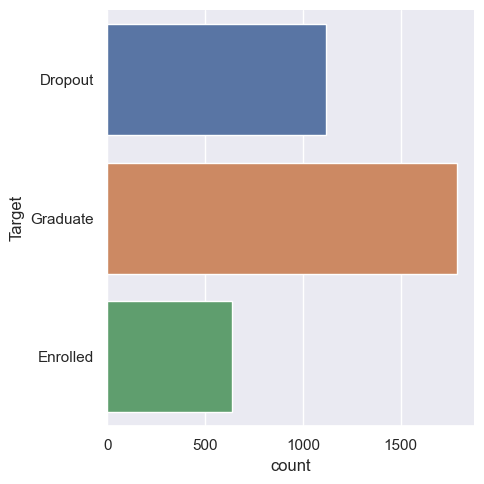

In [396]:
sb.catplot(y = 'Target', data = target_train, kind = "count")

#### Plot the distributions of Sem1 Train

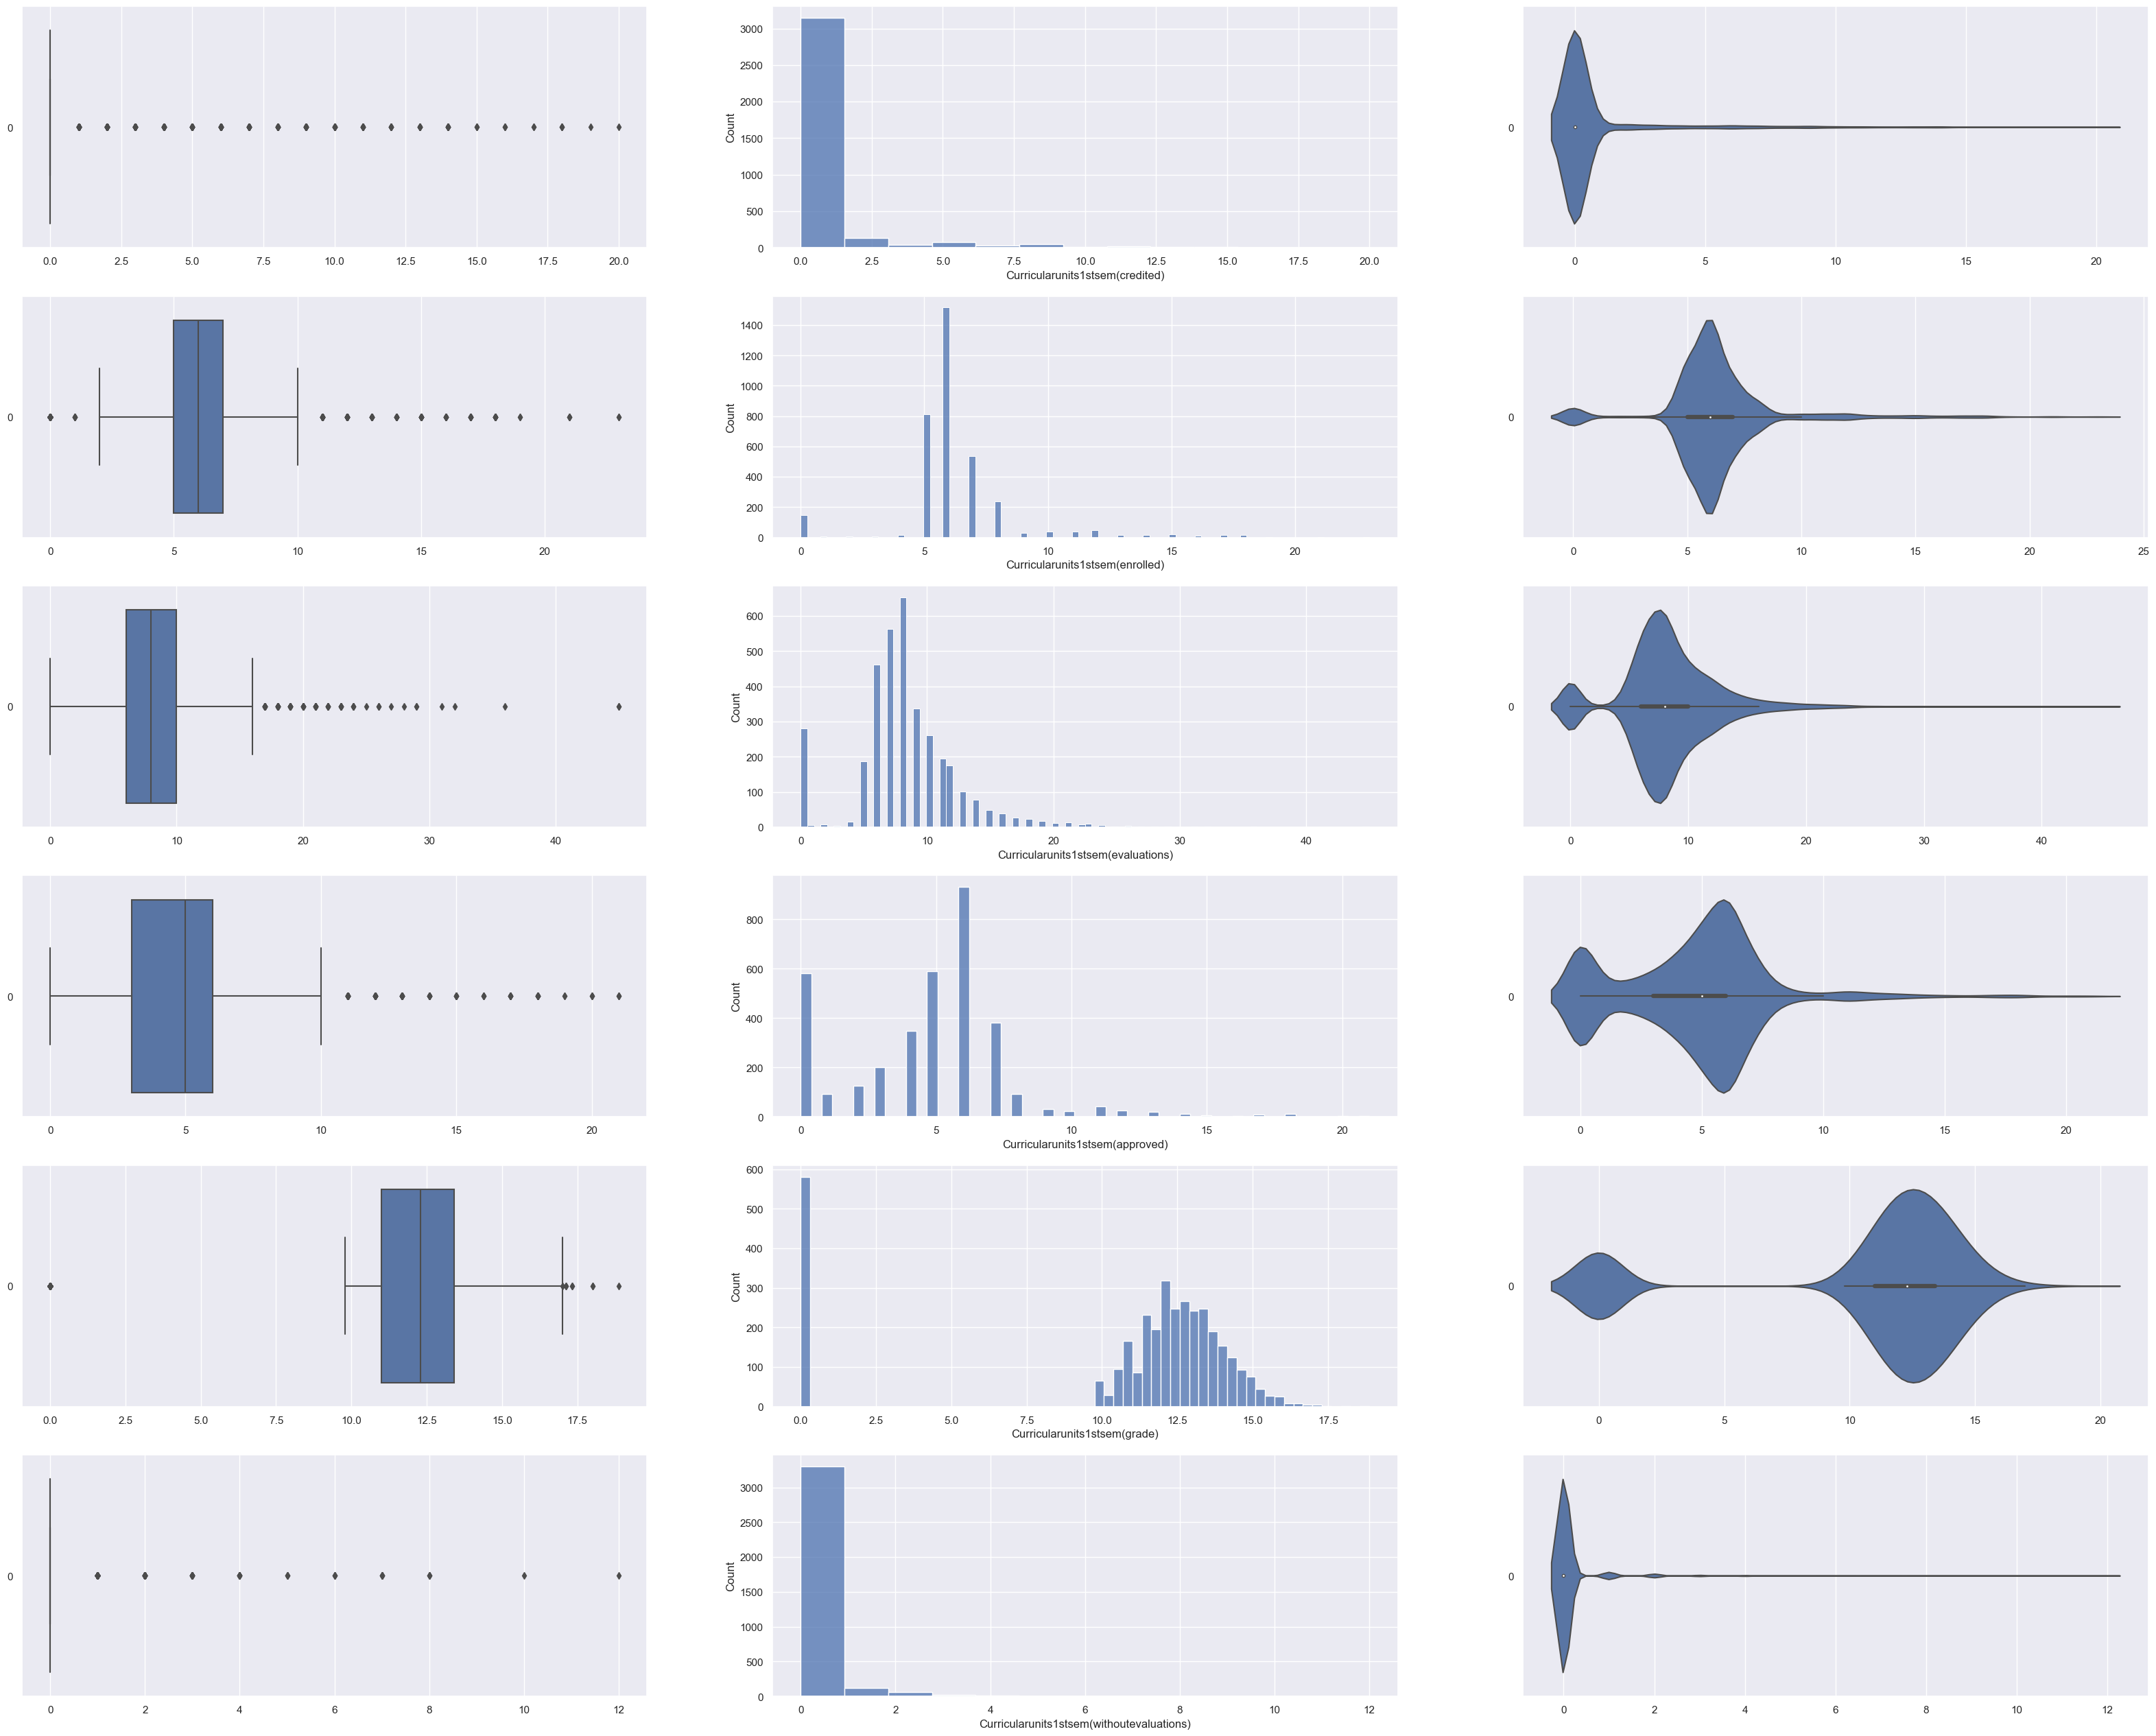

In [397]:
f, axes = plt.subplots(6, 3, figsize=(40, 32))

count = 0
for var in sem1_train:
    sb.boxplot(data = sem1_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = sem1_train[var], ax = axes[count,1])
    sb.violinplot(data = sem1_train[var], orient = "h", ax = axes[count,2])
    count += 1

#### Plot the distributions of Sem2 Train

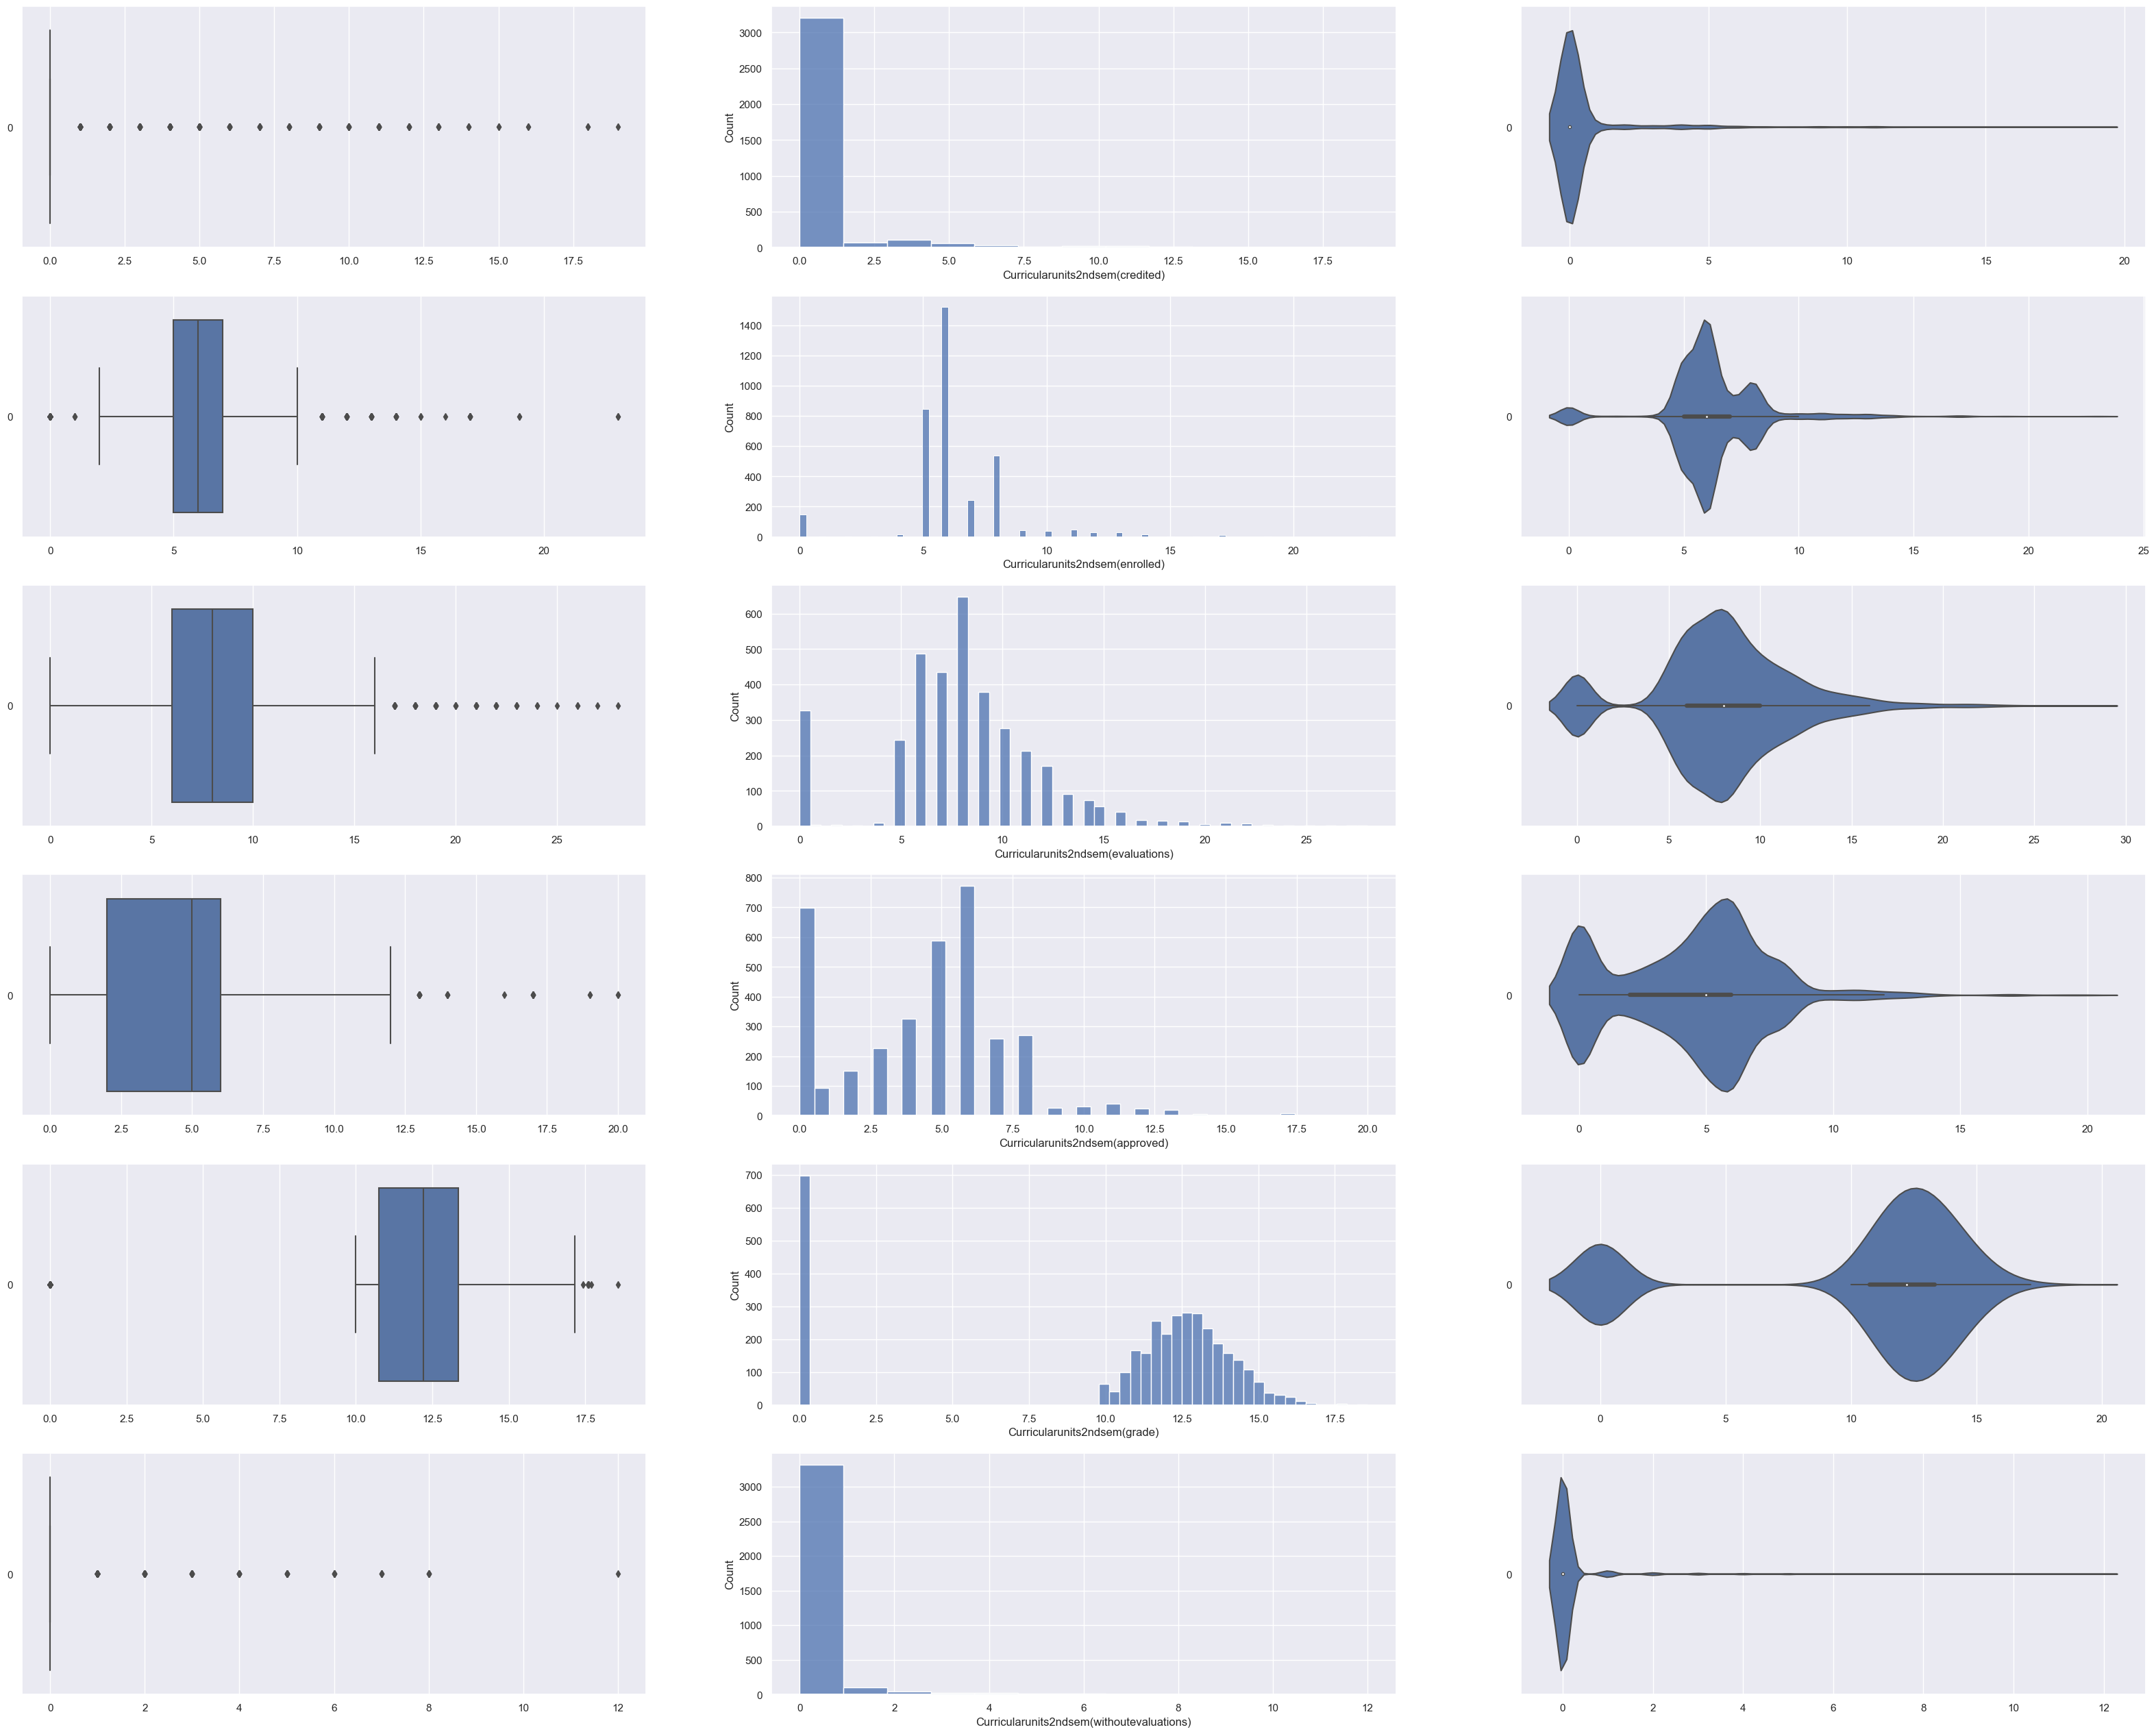

In [398]:
f, axes = plt.subplots(6, 3, figsize=(40, 32))

count = 0
for var in sem2_train:
    sb.boxplot(data = sem2_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = sem2_train[var], ax = axes[count,1])
    sb.violinplot(data = sem2_train[var], orient = "h", ax = axes[count,2])
    count += 1

#### Create a joint dataframe by concatenating Sem1 and Target

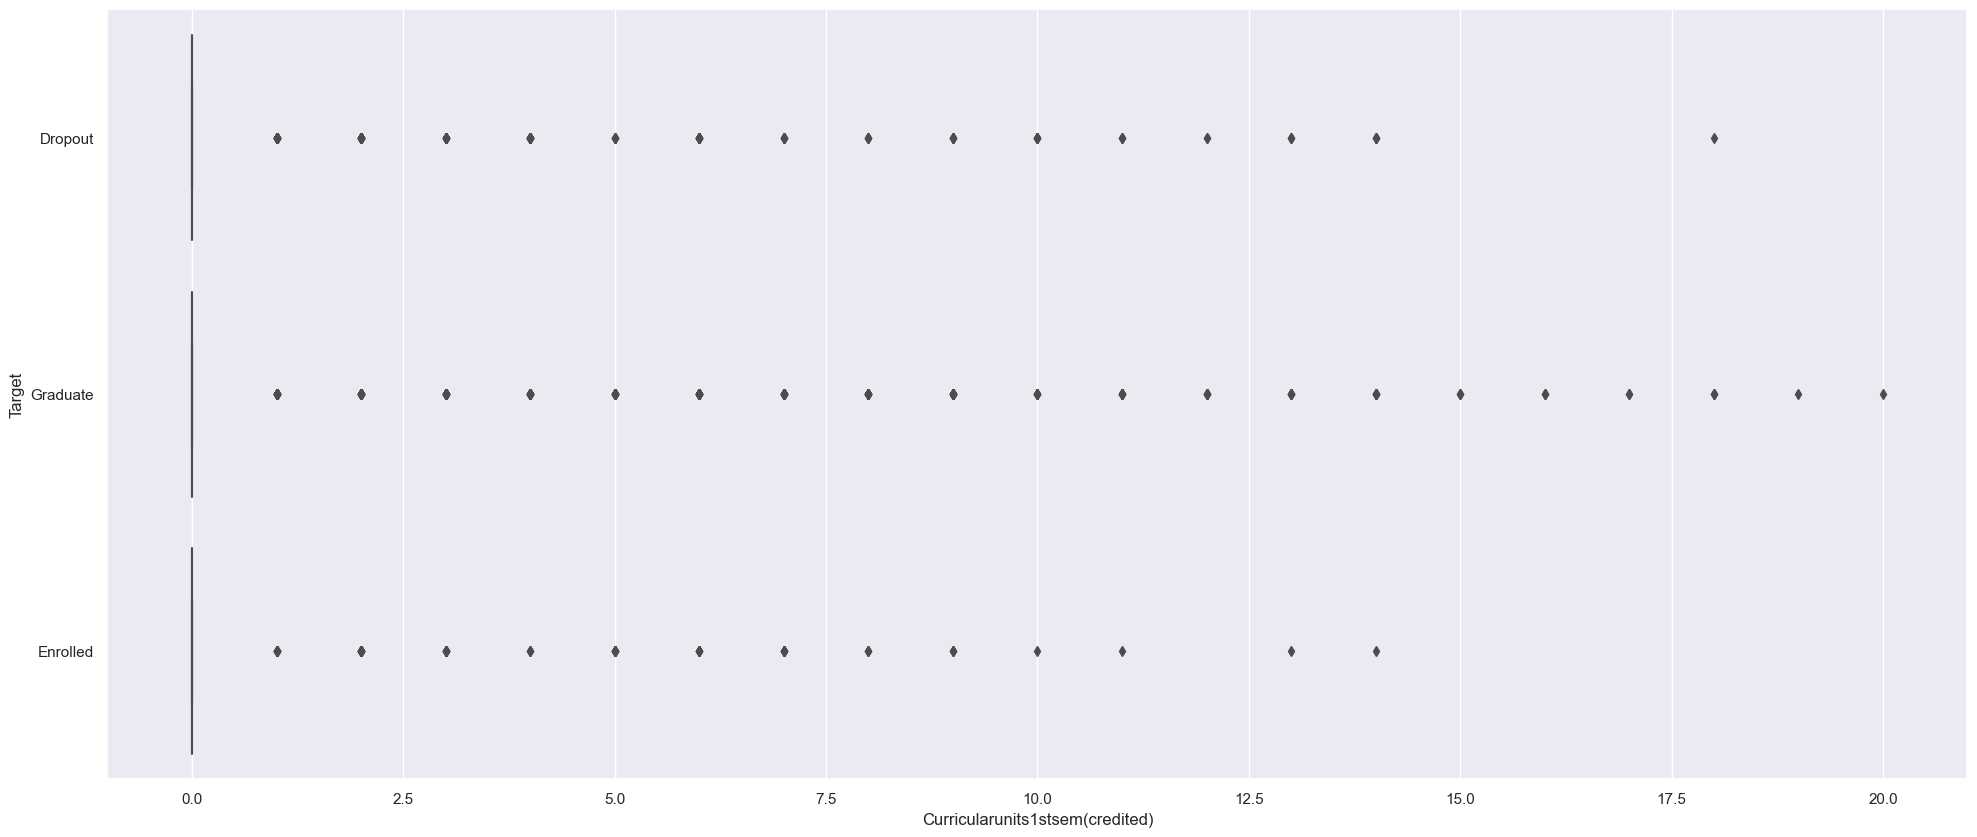

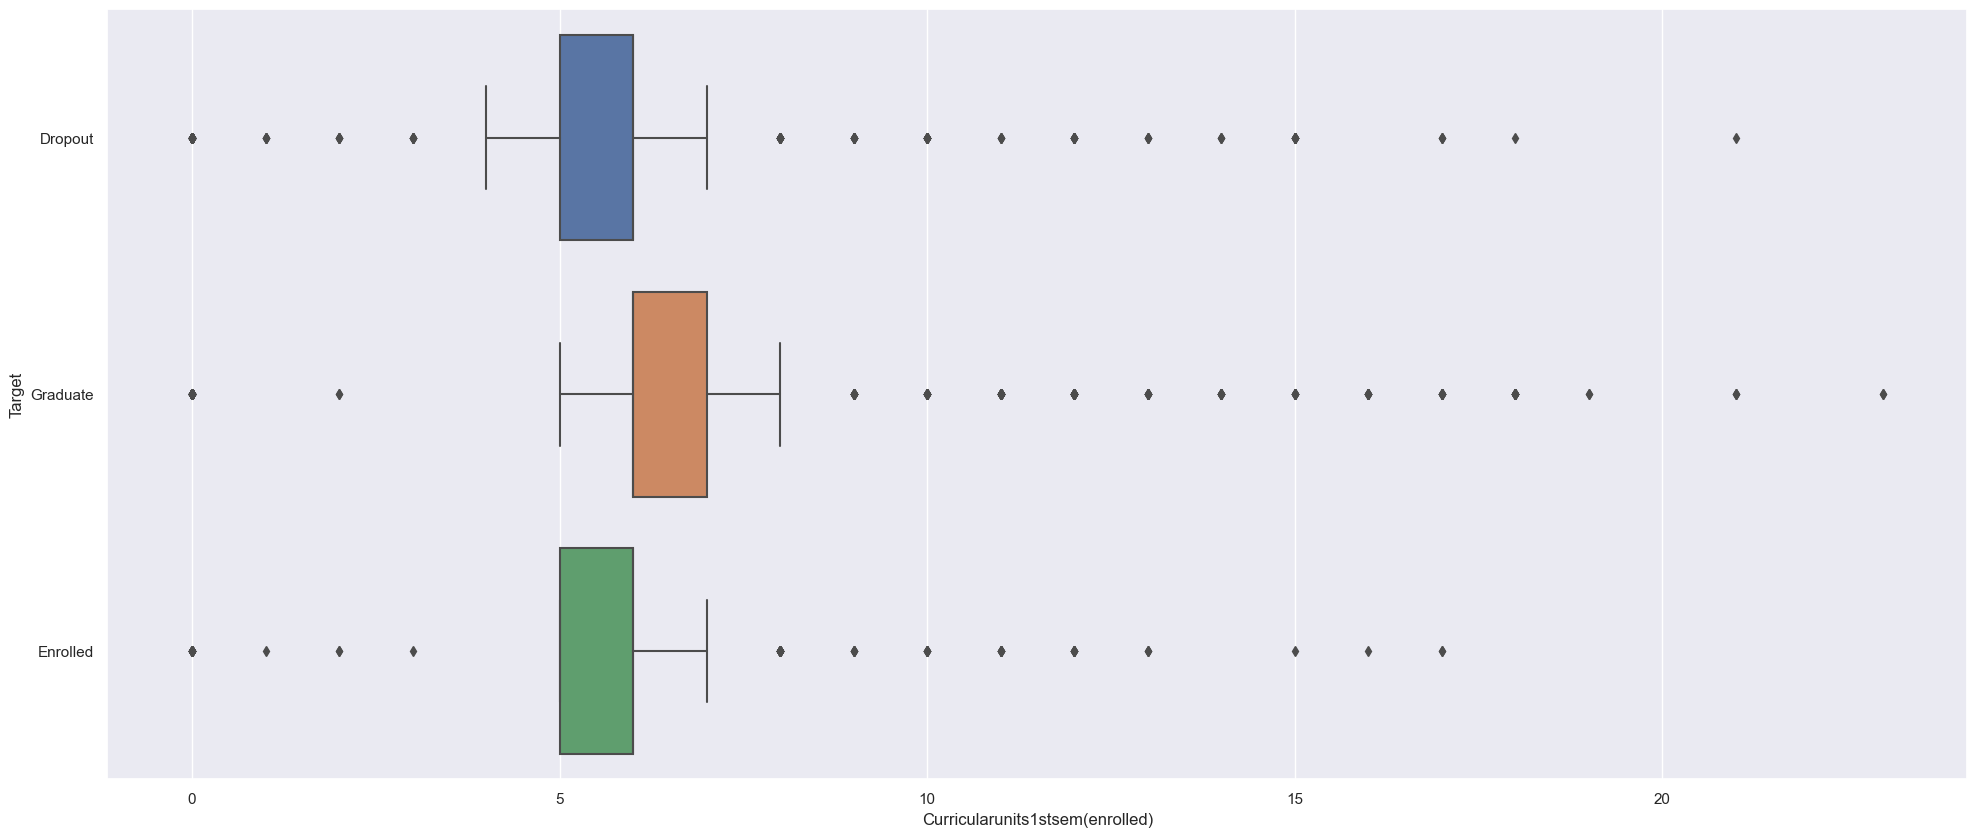

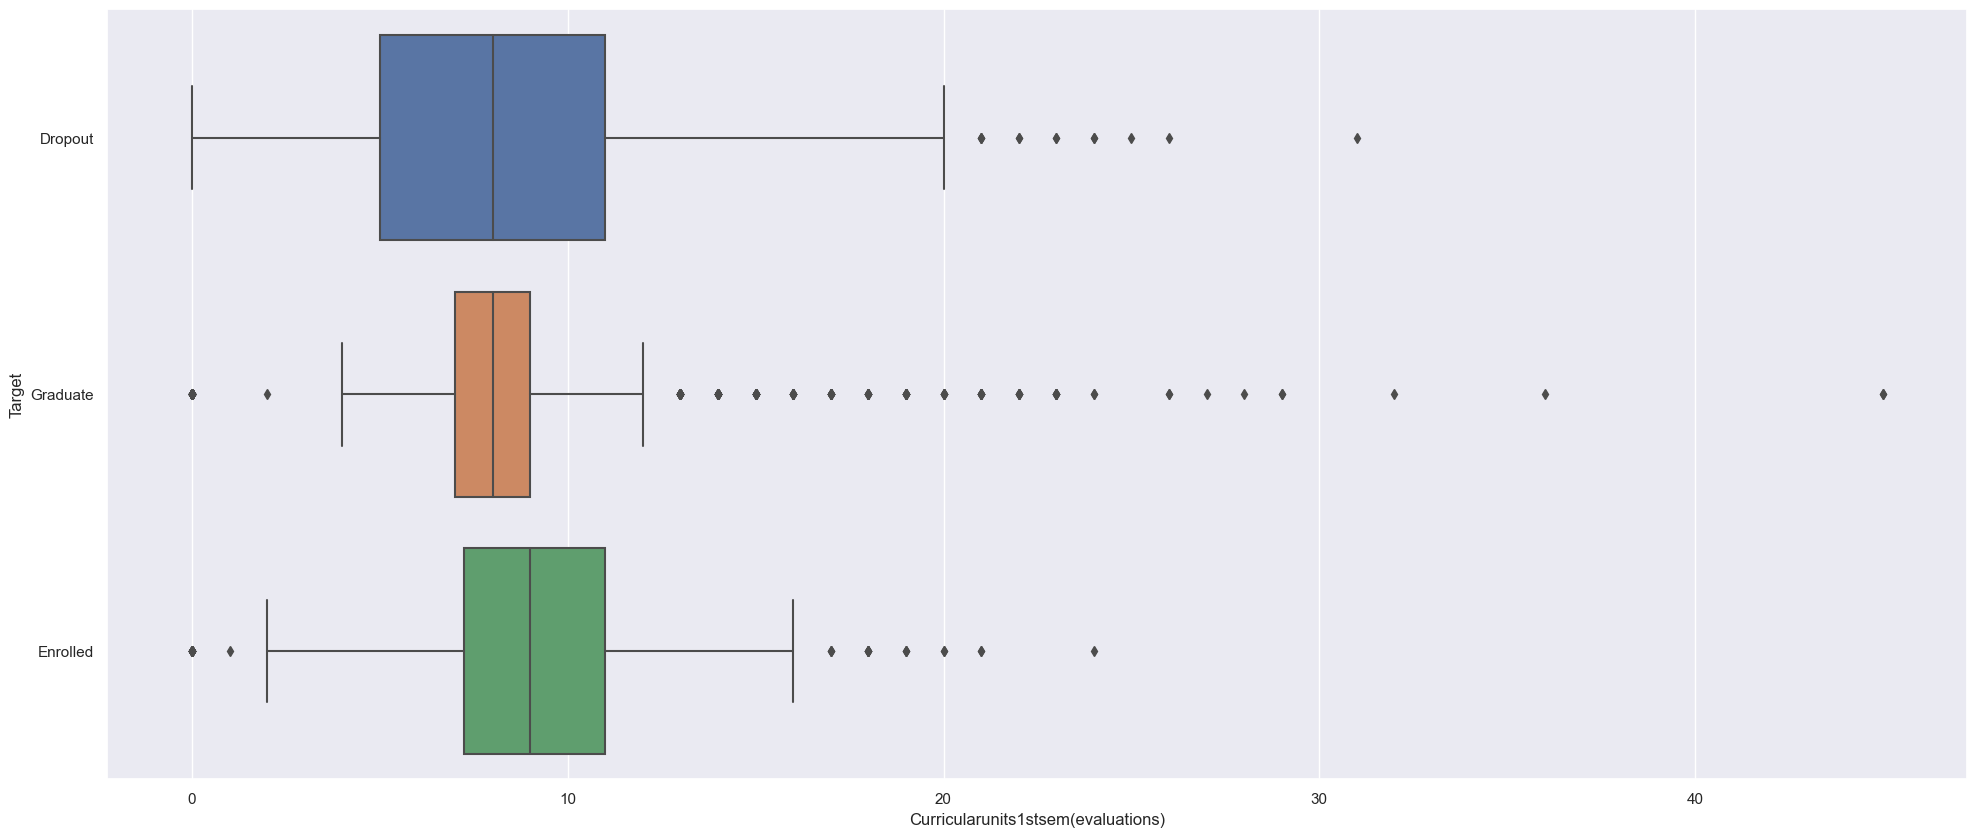

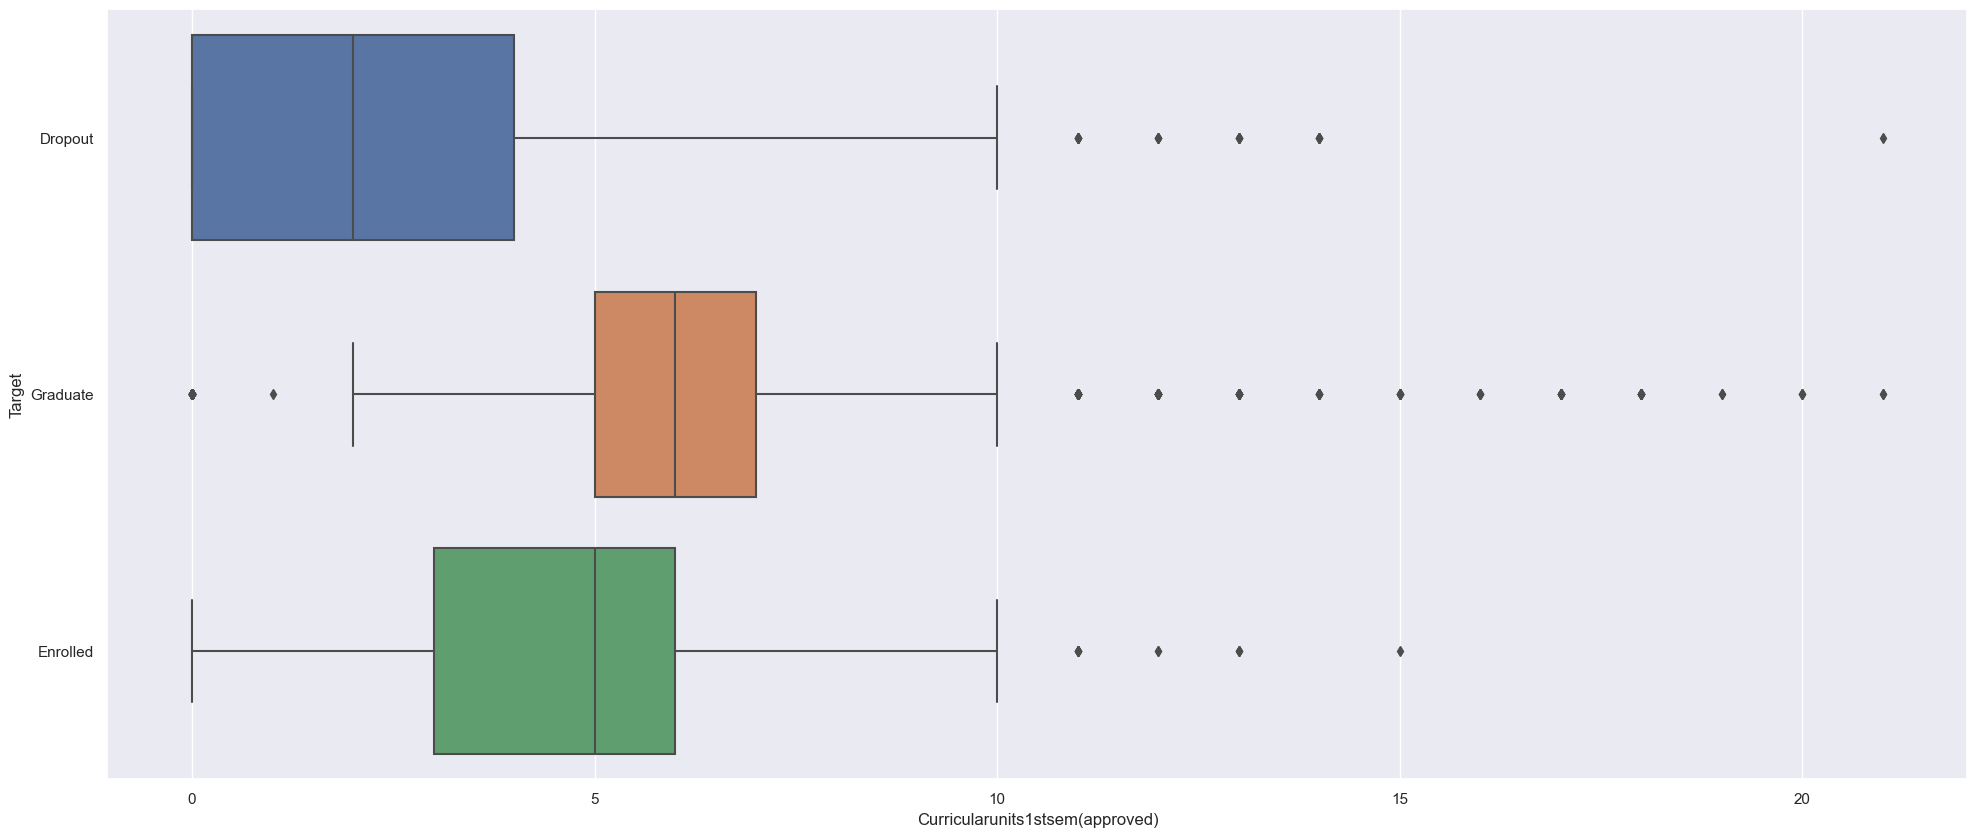

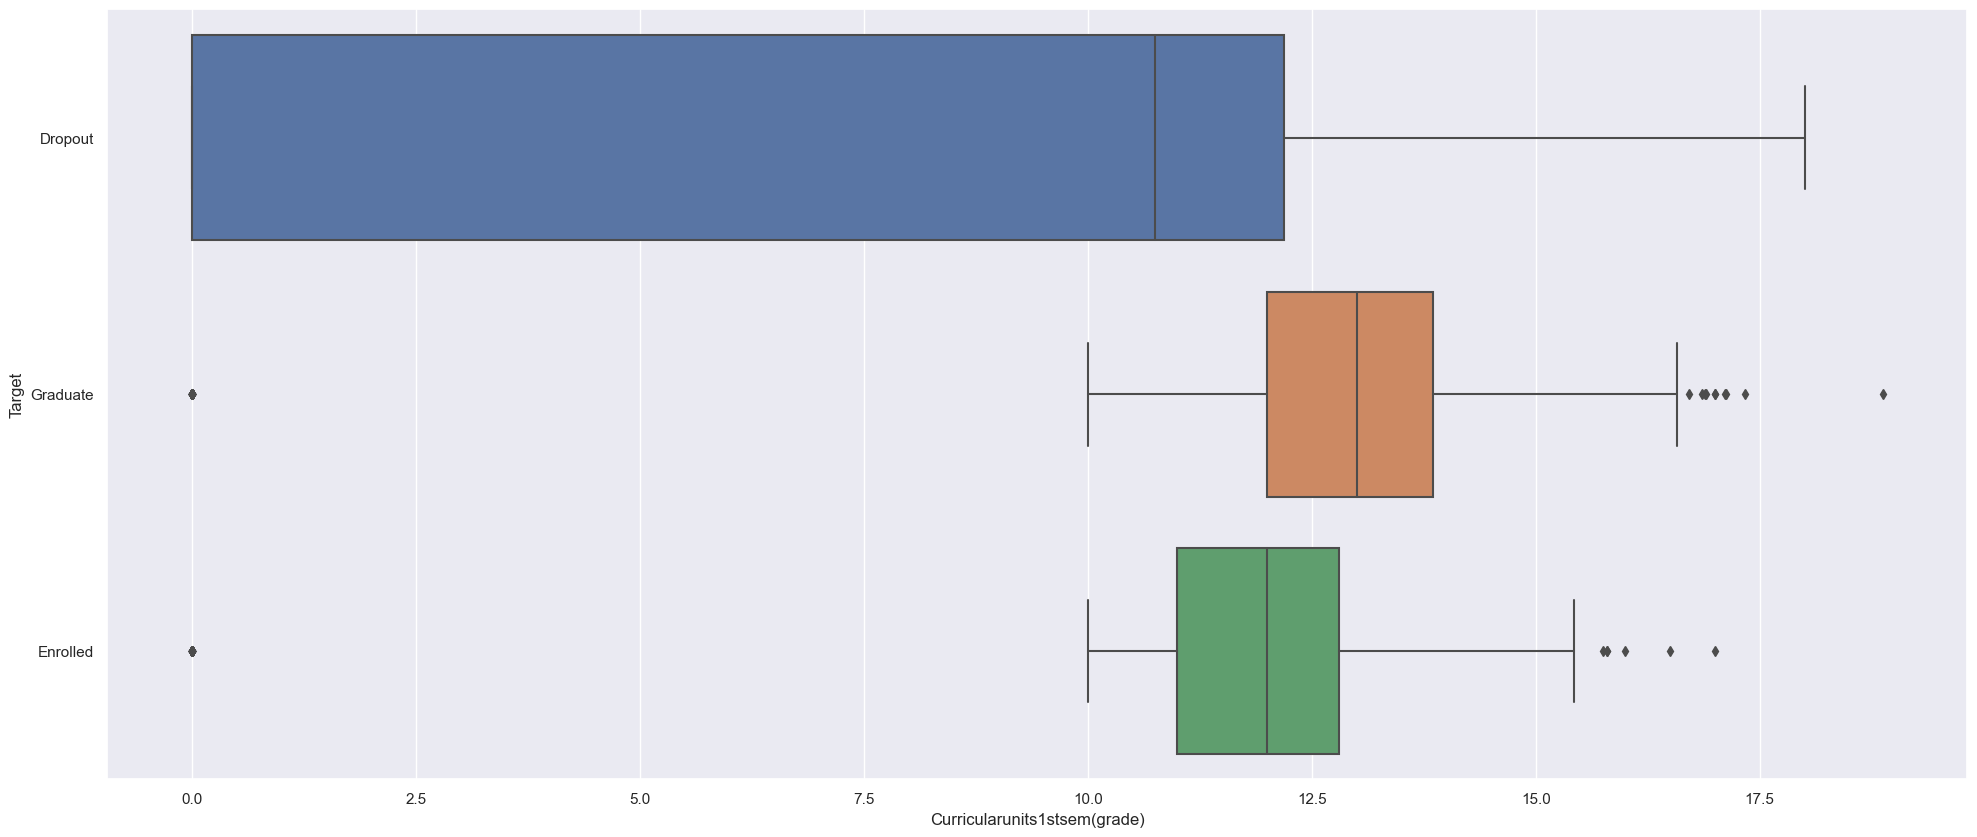

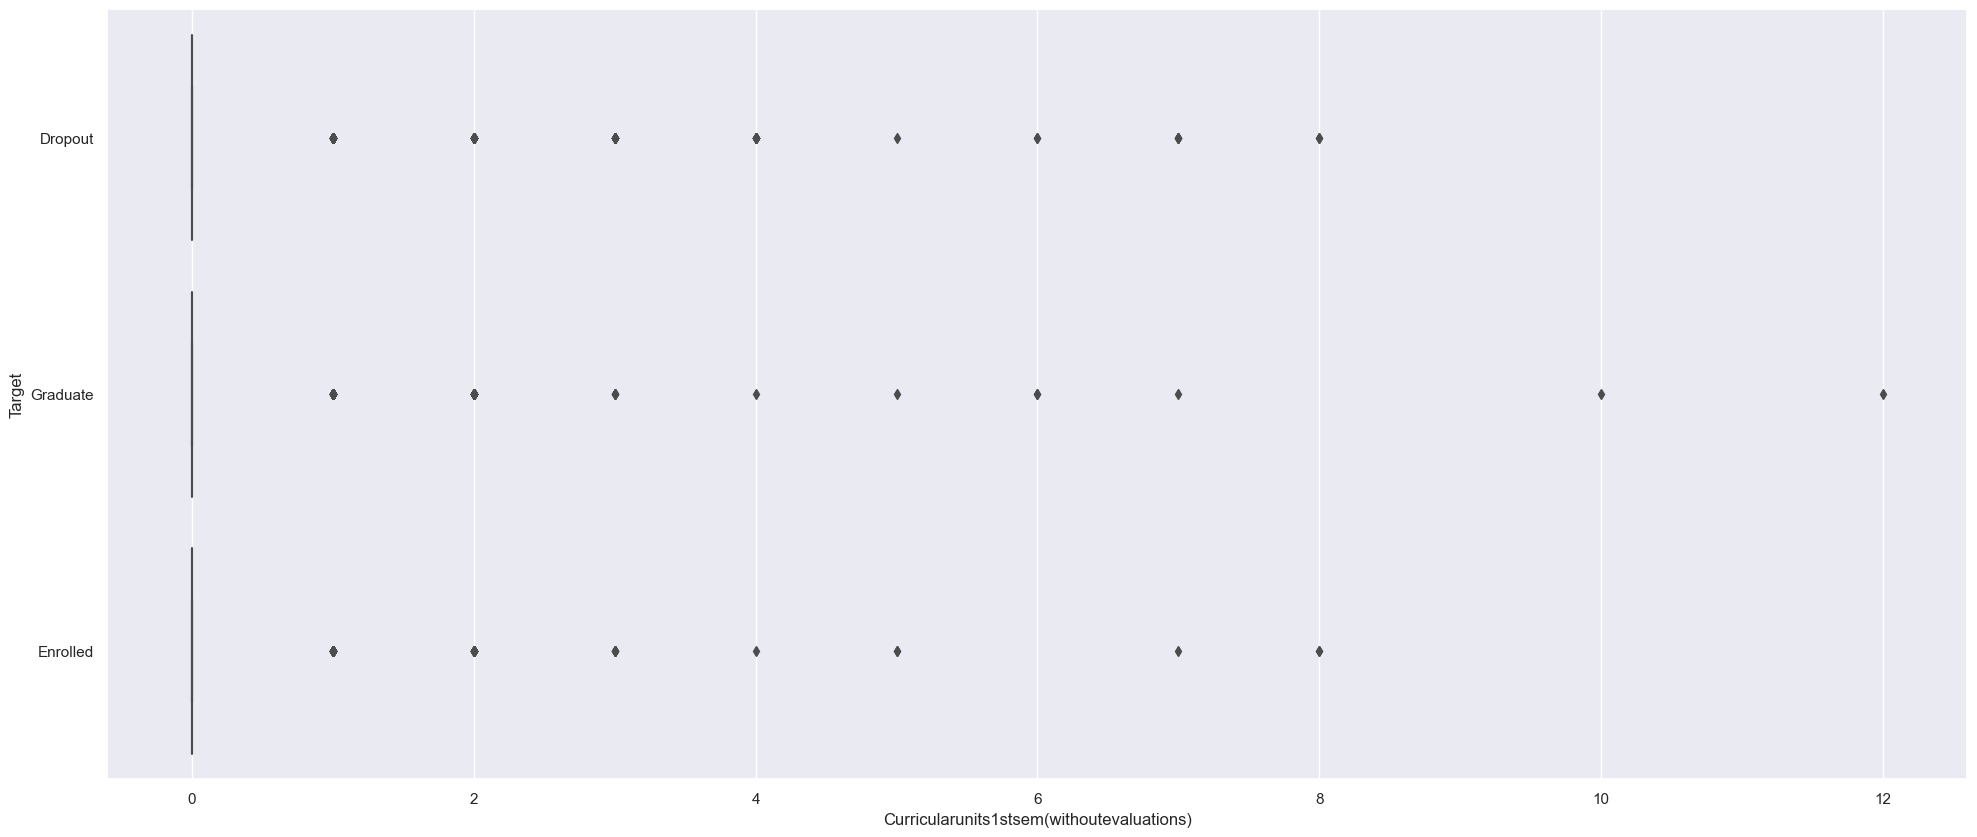

In [399]:
sem1tar = pd.concat([sem1_train, target_train], axis = 1).reindex(sem1_train.index)

# Joint Boxplot of sem1 Train against target Train
count = 0
for var in sem1_train:
    f = plt.figure(figsize=(24, 10))
    sb.boxplot(x = sem1_train[var], y = "Target", data = sem1tar, orient = "h")
    count +=1

#### Create a joint dataframe by concatenating Sem2 and Target

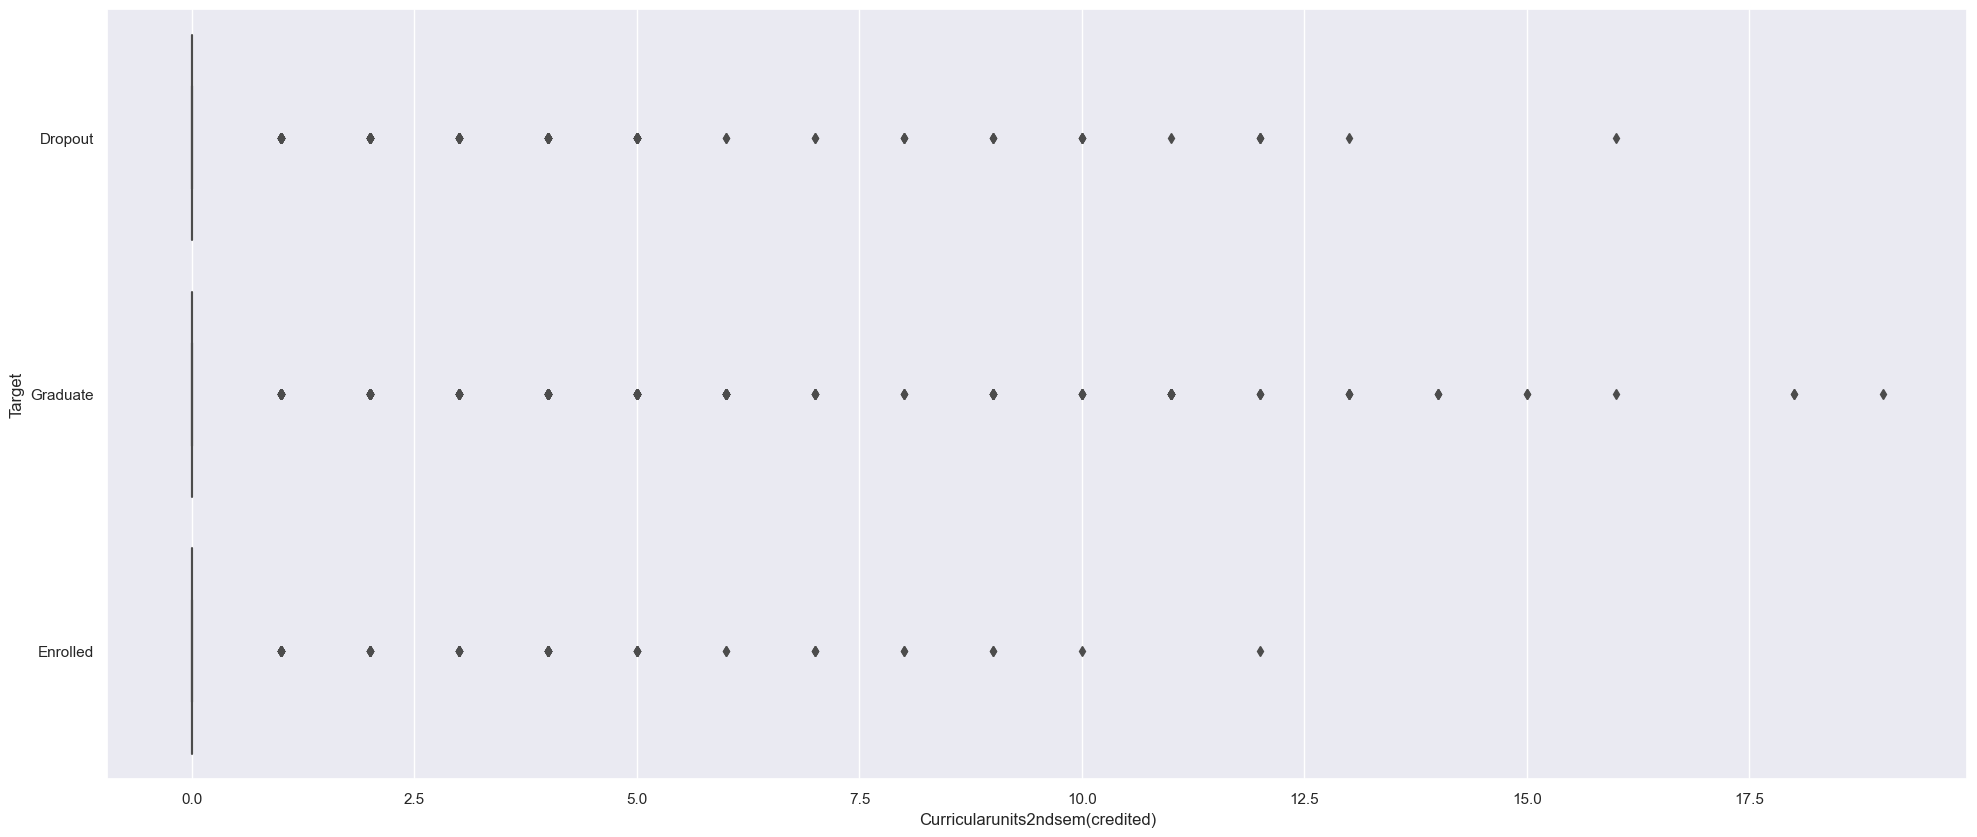

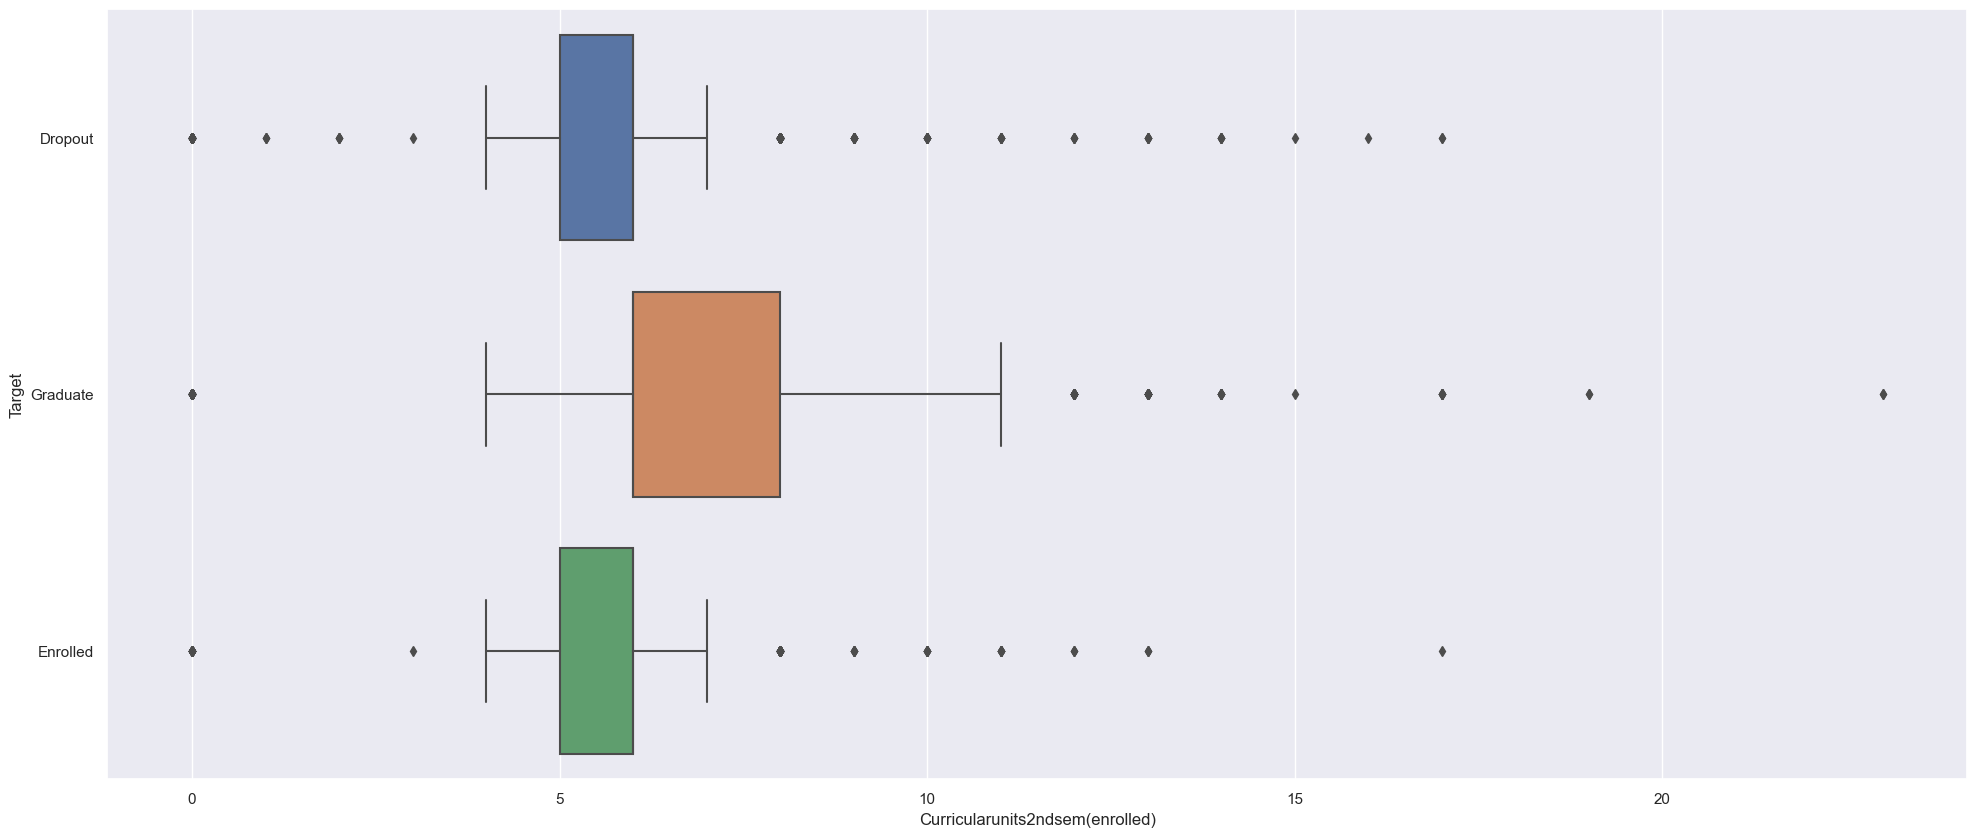

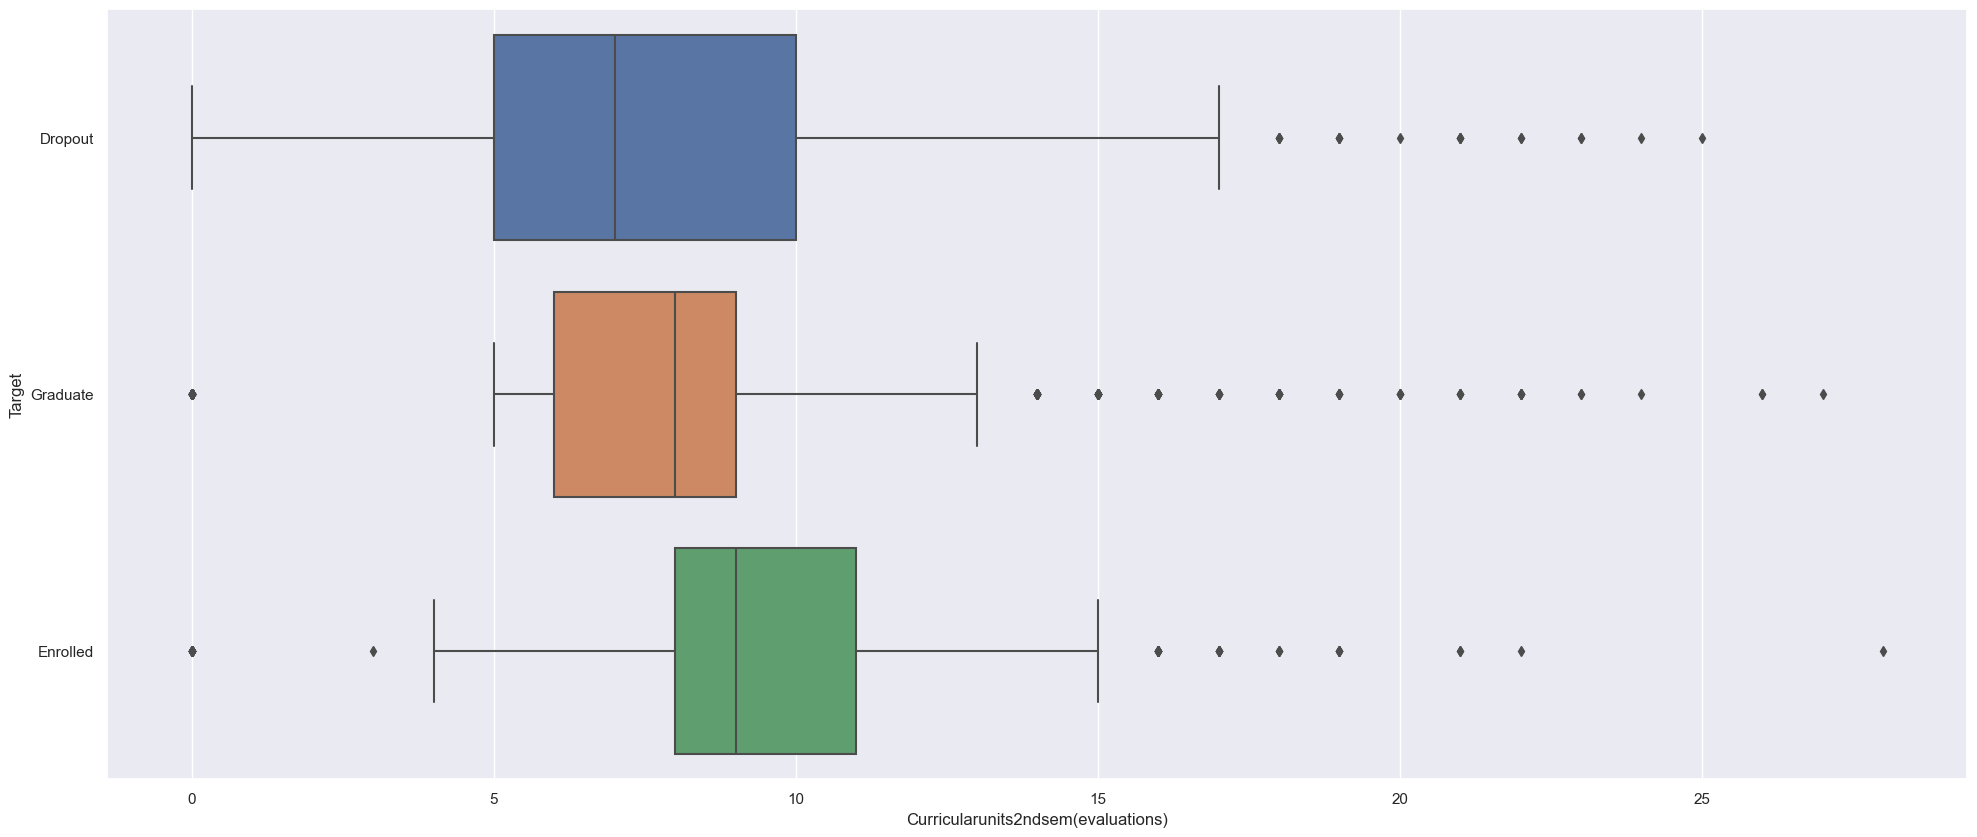

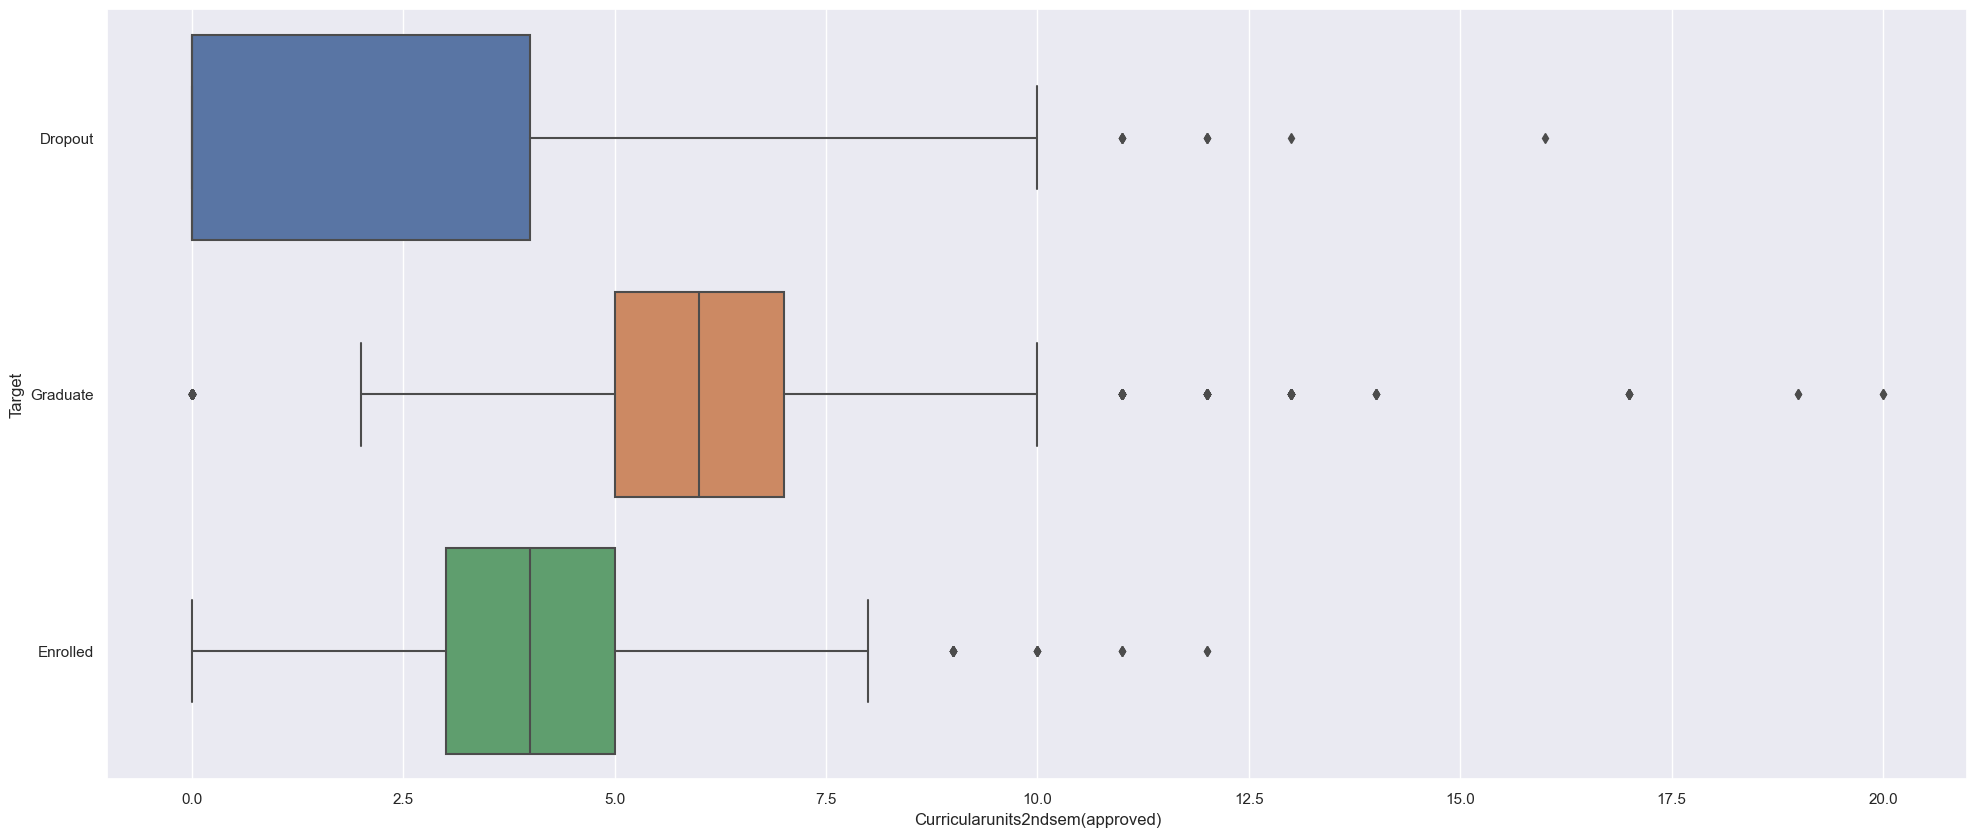

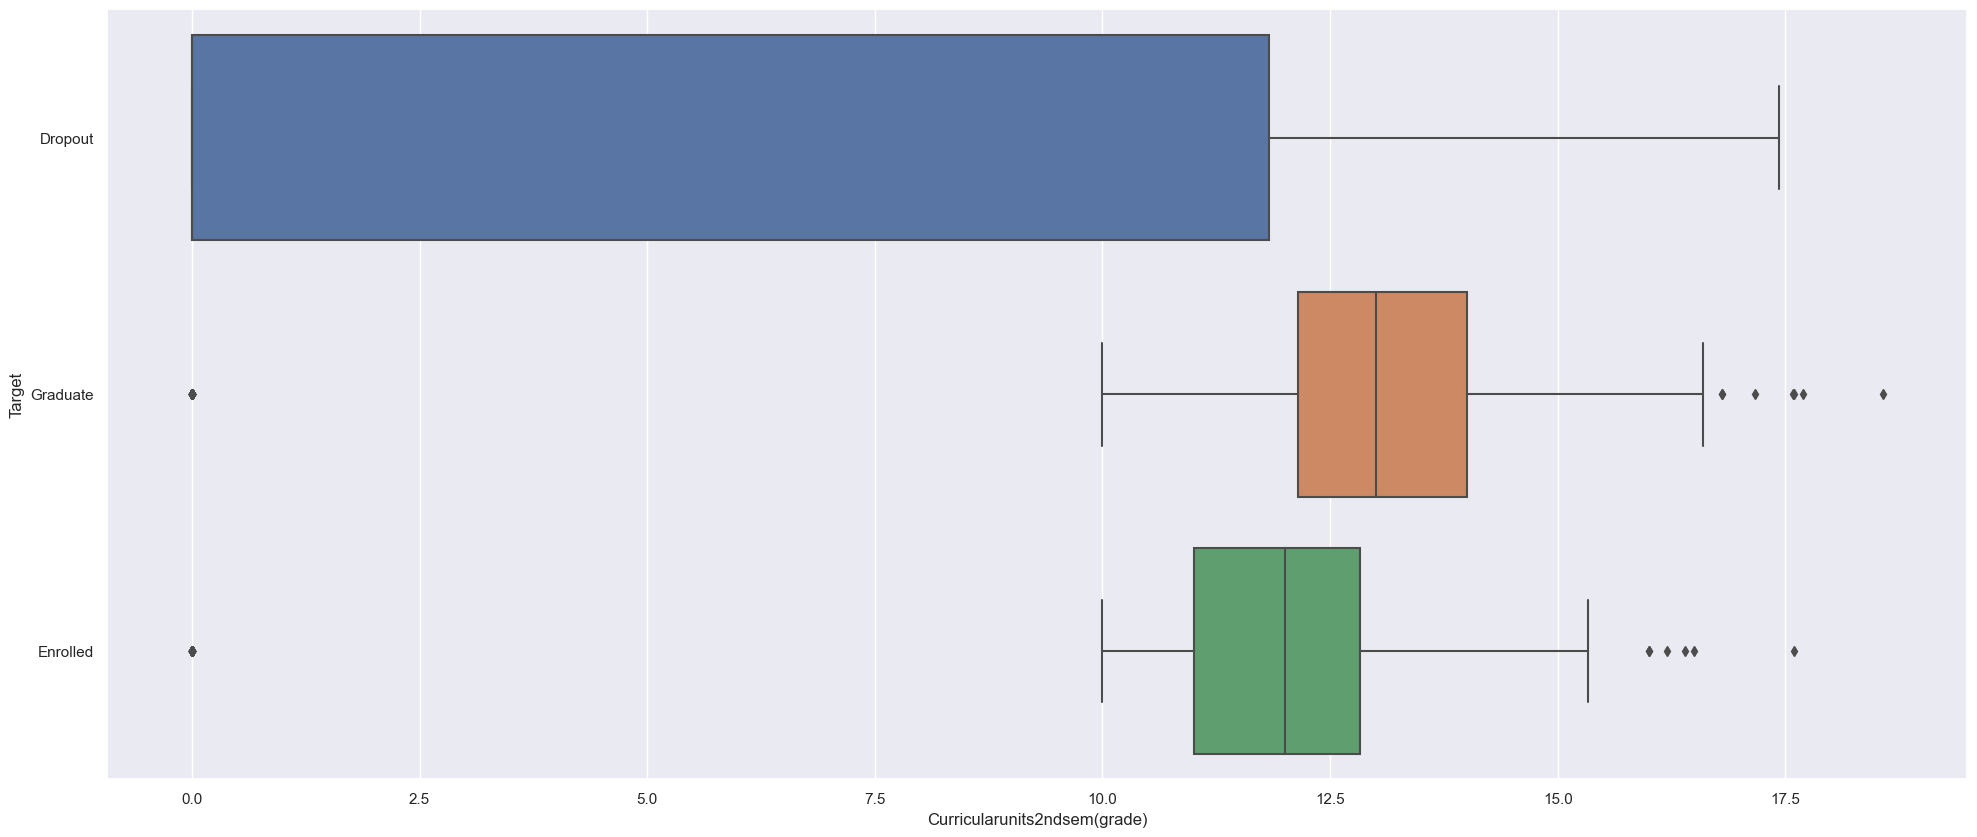

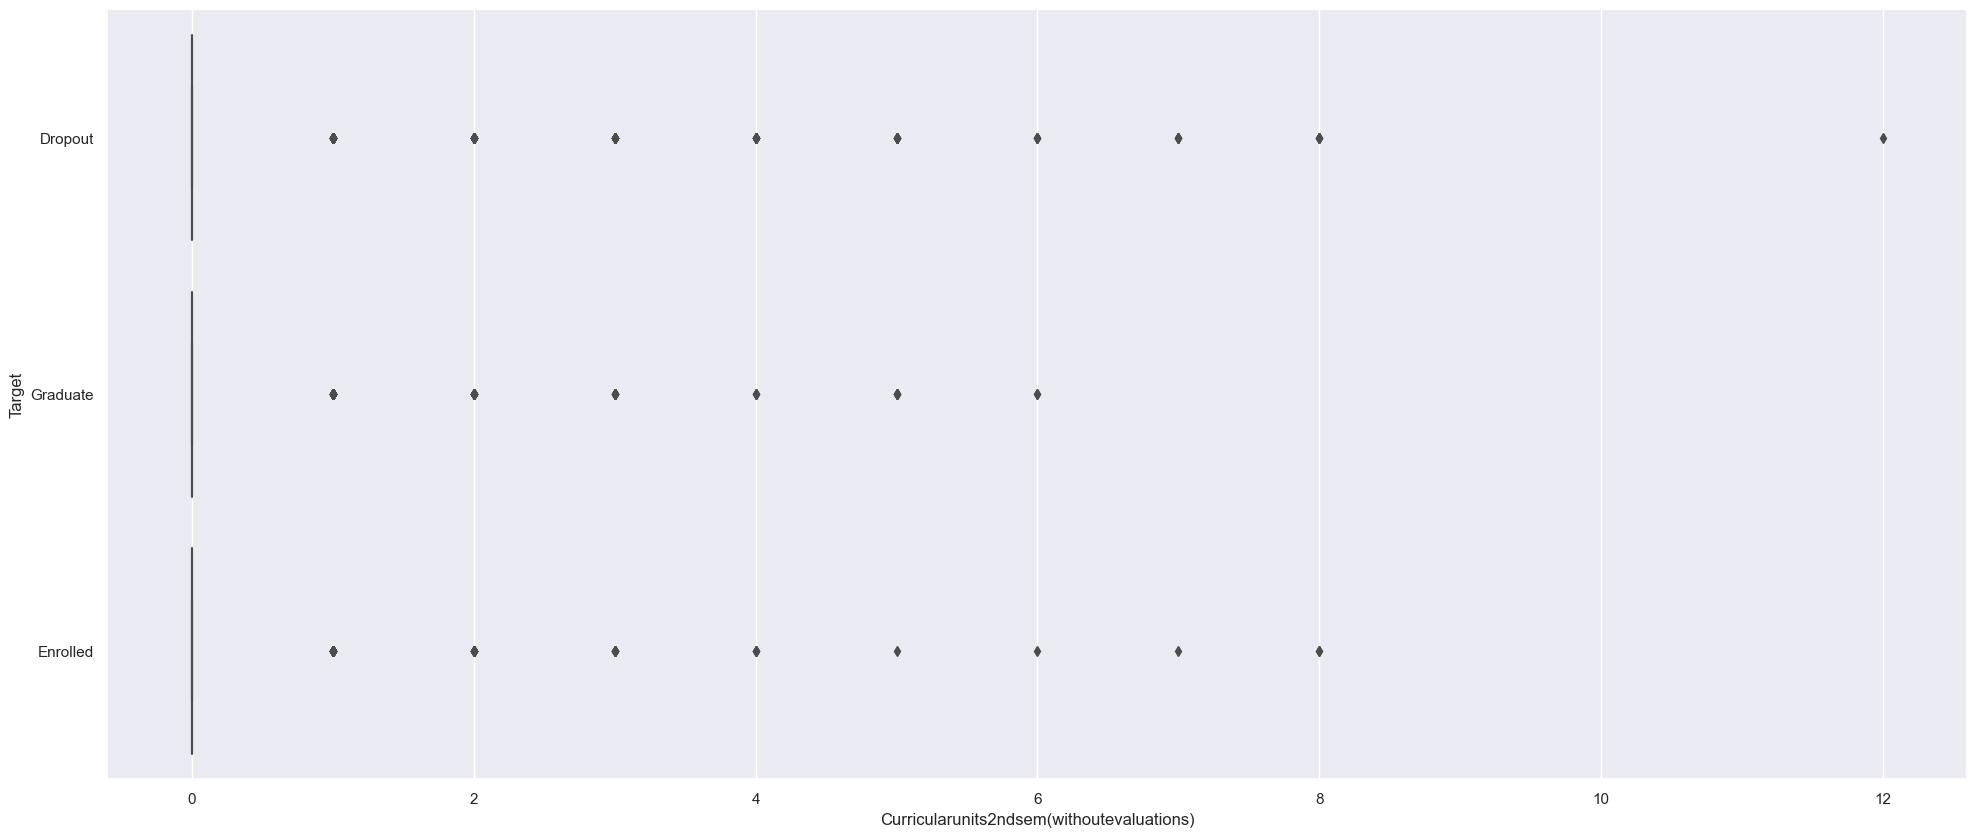

In [400]:
sem2tar = pd.concat([sem2_train, target_train], axis = 1).reindex(sem2_train.index)

# Joint Boxplot of sem1 Train against target Train
count = 0
for var in sem2_train:
    f = plt.figure(figsize=(24, 10))
    sb.boxplot(x = sem2_train[var], y = "Target", data = sem2tar, orient = "h")
    count +=1

## Correlation Heatmap

### Finding correlation between the multiple variables in the multidimensional dataset

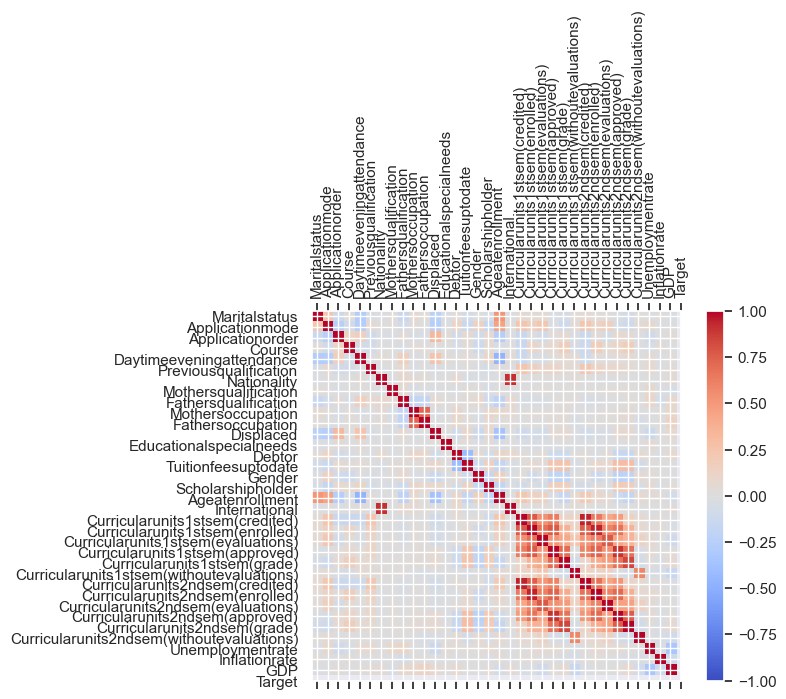

In [401]:
corr_matrix = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()



Grey = no correlation <br>
Dark red = perfect positive correlation <br>
Dark blue = perfect negative correlation <br>

## Feature Importance from coefficients

### Train/Test Model with only ORDINAL variables

In [402]:
#list of predictors
features_list1 = ['Applicationorder',
 'Previousqualification',
 'Mothersqualification',
 'Fathersqualification',
 'Ageatenrollment',
 'Curricularunits1stsem(credited)',
 'Curricularunits1stsem(enrolled)',
 'Curricularunits1stsem(evaluations)',
 'Curricularunits1stsem(approved)',
 'Curricularunits1stsem(grade)',
 'Curricularunits1stsem(withoutevaluations)',
 'Curricularunits2ndsem(credited)',
 'Curricularunits2ndsem(enrolled)',
 'Curricularunits2ndsem(evaluations)',
 'Curricularunits2ndsem(approved)',
 'Curricularunits2ndsem(grade)',
 'Curricularunits2ndsem(withoutevaluations)',
 'Unemploymentrate',
 'Inflationrate',
 'GDP'] 
 #do not include 'Target' which is the response variable

forecast_var = ["Target"]


In [403]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X1 = dfnum[features_list1]
y1 = dfnum[forecast_var]

# Encode categorical features
y1 = y1.astype("category")
le = LabelEncoder()
y1 = le.fit_transform(np.ravel(y1))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.9)

#scale the values so that differences between different columns are less drastic, ensuring better models
ss = StandardScaler()
X1_train_scaled = ss.fit_transform(X1_train)
X1_test_scaled = ss.transform(X1_test)

In [404]:
print(type(y1))

<class 'numpy.ndarray'>


In [405]:
print(type(X1_train))

<class 'pandas.core.frame.DataFrame'>


In [406]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X1_train_scaled, y1_train)
importances1 = pd.DataFrame(data={
    'Attribute': X1_train.columns,
    'Importance': model1.coef_[0]
})
importances1 = importances1.sort_values(by='Importance', ascending=False)

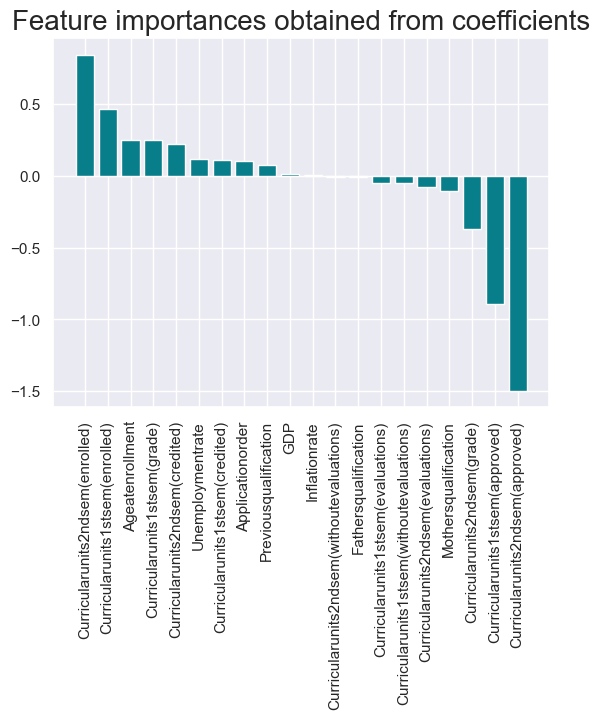

In [407]:
plt.bar(x=importances1['Attribute'], height=importances1['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Test Data
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       142
           1       0.41      0.22      0.29        78
           2       0.77      0.91      0.84       223

    accuracy                           0.73       443
   macro avg       0.65      0.62      0.62       443
weighted avg       0.70      0.73      0.71       443



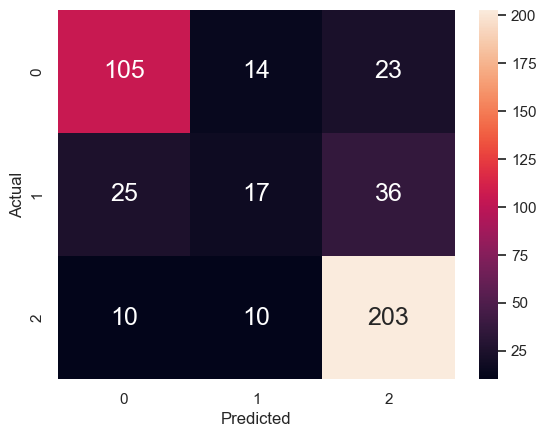

In [408]:
from sklearn.metrics import confusion_matrix, classification_report

# Use model to predict on test data
y1_test_pred = model1.predict(X1_test_scaled)
df.head()

# Print the Classification Accuracy
print("Test Data")
print(classification_report(y1_test, y1_test_pred))

# Plot the two-way Confusion Matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')
sb.heatmap(confusion_matrix(y1_test, y1_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Train/Test Model with ALL variables (i.e. Ordinal and Nominal variables)

In [409]:
#list of predictors
features_list2 = ['Maritalstatus', 'Applicationmode', 'Applicationorder', 'Course',
       'Daytimeeveningattendance', 'Previousqualification', 'Nationality',
       'Mothersqualification', 'Fathersqualification', 'Mothersoccupation',
       'Fathersoccupation', 'Displaced', 'Educationalspecialneeds', 'Debtor',
       'Tuitionfeesuptodate', 'Gender', 'Scholarshipholder', 'Ageatenrollment',
       'International', 'Curricularunits1stsem(credited)',
       'Curricularunits1stsem(enrolled)', 'Curricularunits1stsem(evaluations)',
       'Curricularunits1stsem(approved)', 'Curricularunits1stsem(grade)',
       'Curricularunits1stsem(withoutevaluations)',
       'Curricularunits2ndsem(credited)', 'Curricularunits2ndsem(enrolled)',
       'Curricularunits2ndsem(evaluations)', 'Curricularunits2ndsem(approved)',
       'Curricularunits2ndsem(grade)',
       'Curricularunits2ndsem(withoutevaluations)', 'Unemploymentrate',
       'Inflationrate', 'GDP']
 #do not include 'Target' which is the response variable

forecast_var = ["Target"]
#already defined in above codes

In [410]:
X2 = df[features_list2]
y2 = df[forecast_var] 

# Encode categorical features
y2 = y2.astype("category")
le = LabelEncoder()
y2 = le.fit_transform(np.ravel(y2))

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.9)

#scale the values so that differences between different columns are less drastic, ensuring better models
ss = StandardScaler()
X2_train_scaled = ss.fit_transform(X2_train)
X2_test_scaled = ss.transform(X2_test)

In [411]:
model2 = LogisticRegression()
model2.fit(X2_train_scaled, y2_train)
importances2 = pd.DataFrame(data={
    'Attribute': X2_train.columns,
    'Importance': model2.coef_[0]
})
importances2 = importances2.sort_values(by='Importance', ascending=False)

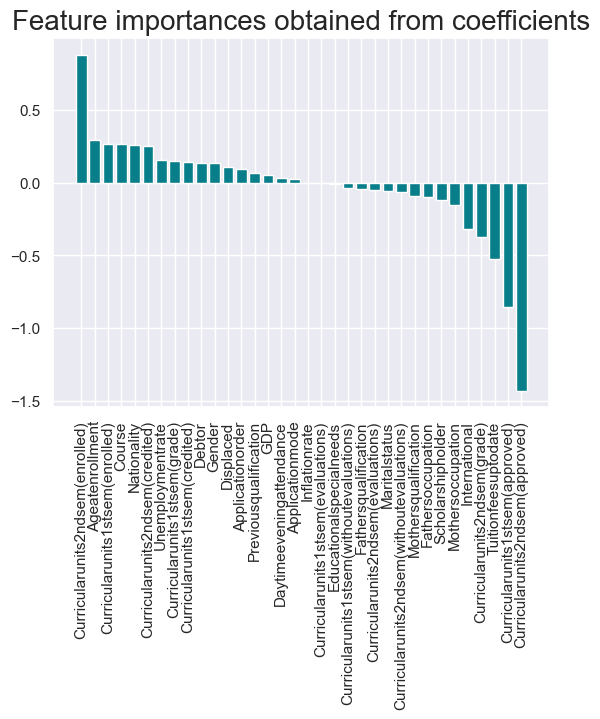

In [412]:
plt.bar(x=importances2['Attribute'], height=importances2['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Test Data
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       131
           1       0.57      0.38      0.46        76
           2       0.81      0.92      0.86       236

    accuracy                           0.78       443
   macro avg       0.73      0.69      0.70       443
weighted avg       0.77      0.78      0.77       443



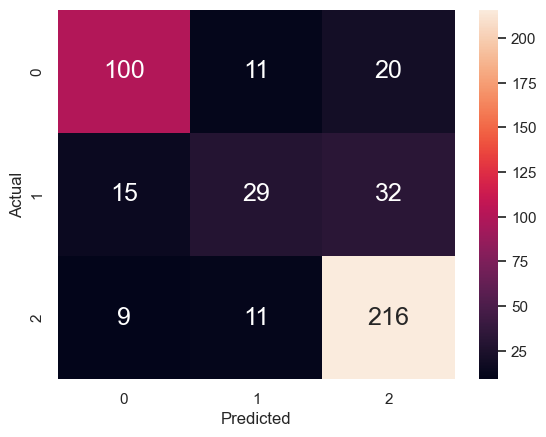

In [413]:
# Use model to predict on test data
y2_test_pred = model2.predict(X2_test_scaled)
df.head()

# Print the Classification Accuracy
print("Test Data")
print(classification_report(y2_test, y2_test_pred))

# Plot the two-way Confusion Matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')
sb.heatmap(confusion_matrix(y2_test, y2_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Feature Importance from a tree-based model

In [414]:
from xgboost import XGBClassifier

model3 = XGBClassifier()
model3.fit(X1_train_scaled, y1_train)
importances1 = pd.DataFrame(data={
    'Attribute': X1_train.columns,
    'Importance': model3.feature_importances_
})
importances1 = importances1.sort_values(by='Importance', ascending=False)

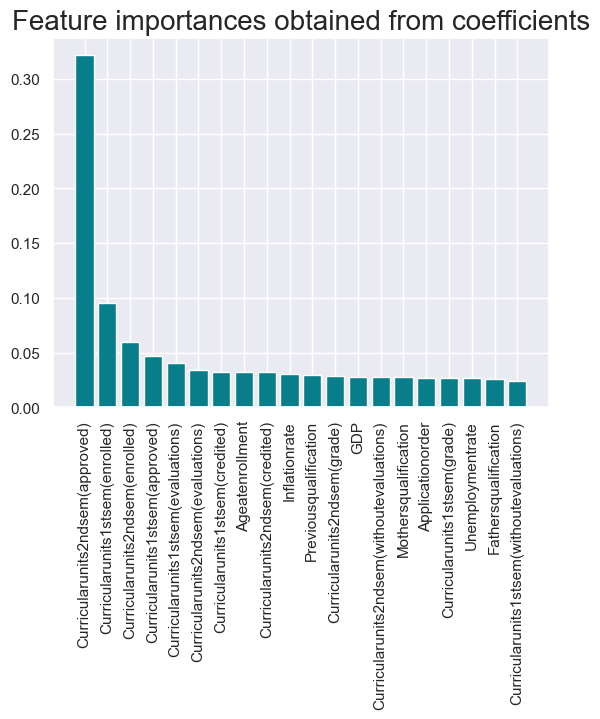

In [415]:
plt.bar(x=importances1['Attribute'], height=importances1['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Test Data
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       142
           1       0.44      0.32      0.37        78
           2       0.79      0.89      0.84       223

    accuracy                           0.74       443
   macro avg       0.67      0.65      0.65       443
weighted avg       0.72      0.74      0.73       443



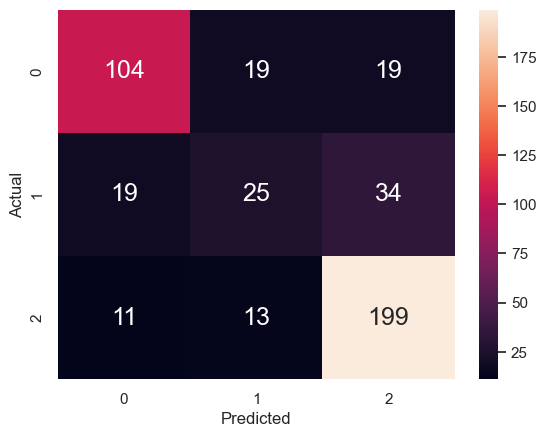

In [416]:
# Use model to predict on test data
y1_test_pred = model3.predict(X1_test_scaled)
df.head()

# Print the Classification Accuracy
print("Test Data")
print(classification_report(y1_test, y1_test_pred))

# Plot the two-way Confusion Matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')
sb.heatmap(confusion_matrix(y1_test, y1_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [417]:
model4 = XGBClassifier()
model4.fit(X2_train_scaled, y2_train)
importances2 = pd.DataFrame(data={
    'Attribute': X2_train.columns,
    'Importance': model4.feature_importances_
})
importances2 = importances2.sort_values(by='Importance', ascending=False)

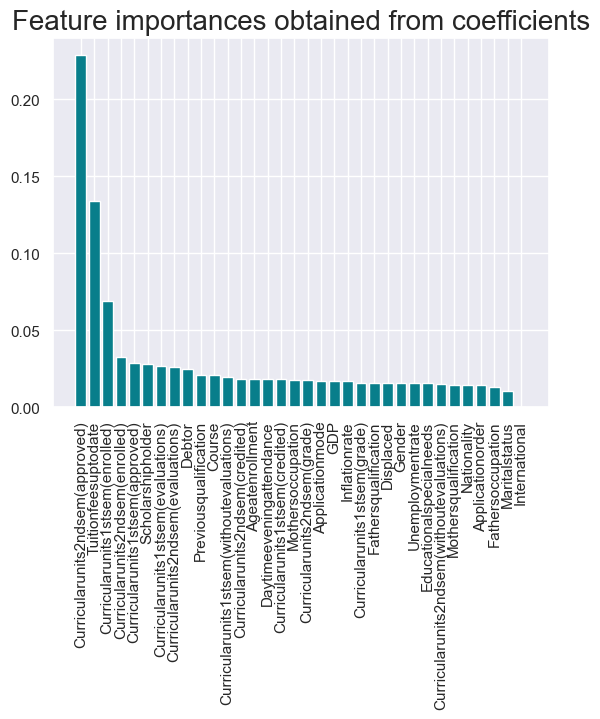

In [418]:
plt.bar(x=importances2['Attribute'], height=importances2['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Test Data
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       131
           1       0.54      0.41      0.47        76
           2       0.82      0.91      0.87       236

    accuracy                           0.78       443
   macro avg       0.72      0.69      0.70       443
weighted avg       0.77      0.78      0.77       443



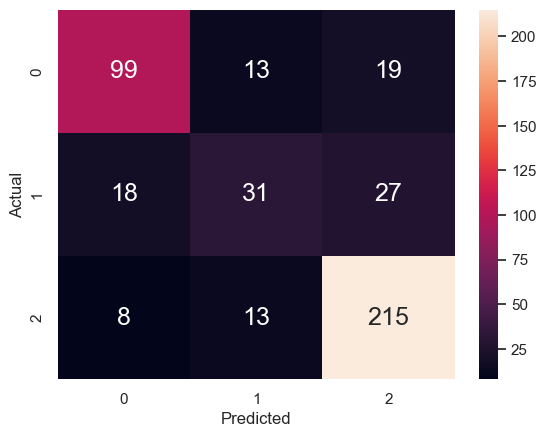

In [419]:
# Use model to predict on test data
y2_test_pred = model4.predict(X2_test_scaled)
df.head()

# Print the Classification Accuracy
print("Test Data")
print(classification_report(y2_test, y2_test_pred))

# Plot the two-way Confusion Matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')
sb.heatmap(confusion_matrix(y2_test, y2_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()